## --------------------------Credit EDA Case Study-------------------------------

In [1]:
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns  
import numpy as np

In [2]:
df = pd.read_csv("application_data.csv")

pd.set_option('display.max_rows',100)
pd.set_option('display.max_columns',200)
pd.set_option('display.width',500)


In [3]:
df.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,FLOORSMIN_AVG,LANDAREA_AVG,LIVINGAPARTMENTS_AVG,LIVINGAREA_AVG,NONLIVINGAPARTMENTS_AVG,NONLIVINGAREA_AVG,APARTMENTS_MODE,BASEMENTAREA_MODE,YEARS_BEGINEXPLUATATION_MODE,YEARS_BUILD_MODE,COMMONAREA_MODE,ELEVATORS_MODE,ENTRANCES_MODE,FLOORSMAX_MODE,FLOORSMIN_MODE,LANDAREA_MODE,LIVINGAPARTMENTS_MODE,LIVINGAREA_MODE,NONLIVINGAPARTMENTS_MODE,NONLIVINGAREA_MODE,APARTMENTS_MEDI,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BUILD_MEDI,COMMONAREA_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,FONDKAPREMONT_MODE,HOUSETYPE_MODE,TOTALAREA_MODE,WALLSMATERIAL_MODE,EMERGENCYSTATE_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,-9461,-637,-3648.0,-2120,NaN,1,1,0,1,1,0,Laborers,1.0,2,2,WEDNESDAY,10,0,0,0,0,0,0,Business Entity Type 3,0.083037,0.262949,0.139376,0.0247,0.0369,0.9722,0.6192,0.0143,0.00,0.0690,0.0833,0.1250,0.0369,0.0202,0.0190,0.0000,0.0000,0.0252,0.0383,0.9722,0.6341,0.0144,0.0000,0.0690,0.0833,0.1250,0.0377,0.022,0.0198,0.0,0.0,0.0250,0.0369,0.9722,0.6243,0.0144,0.00,0.0690,0.0833,0.1250,0.0375,0.0205,0.0193,0.0000,0.00,reg oper account,block of flats,0.0149,"Stone, brick",No,2.0,2.0,2.0,2.0,-1134.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,-16765,-1188,-1186.0,-291,NaN,1,1,0,1,1,0,Core staff,2.0,1,1,MONDAY,11,0,0,0,0,0,0,School,0.311267,0.622246,NaN,0.0959,0.0529,0.9851,0.7960,0.0605,0.08,0.0345,0.2917,0.3333,0.0130,0.0773,0.0549,0.0039,0.0098,0.0924,0.0538,0.9851,0.8040,0.0497,0.0806,0.0345,0.2917,0.3333,0.0128,0.079,0.0554,0.0,0.0,0.0968,0.0529,0.9851,0.7987,0.0608,0.08,0.0345,0.2917,0.3333,0.0132,0.0787,0.0558,0.0039,0.01,reg oper account,block of flats,0.0714,Block,No,1.0,0.0,1.0,0.0,-828.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,135000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.010032,-19046,-225,-4260.0,-2531,26.0,1,1,1,1,1,0,Laborers,1.0,2,2,MONDAY,9,0,0,0,0,0,0,Government,NaN,0.555912,0.729567,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,

In [4]:
df.shape

(307511, 122)

In [5]:
df.columns

Index(['SK_ID_CURR', 'TARGET', 'NAME_CONTRACT_TYPE', 'CODE_GENDER', 'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL', 'AMT_CREDIT', 'AMT_ANNUITY',
       ...
       'FLAG_DOCUMENT_18', 'FLAG_DOCUMENT_19', 'FLAG_DOCUMENT_20', 'FLAG_DOCUMENT_21', 'AMT_REQ_CREDIT_BUREAU_HOUR', 'AMT_REQ_CREDIT_BUREAU_DAY', 'AMT_REQ_CREDIT_BUREAU_WEEK', 'AMT_REQ_CREDIT_BUREAU_MON', 'AMT_REQ_CREDIT_BUREAU_QRT', 'AMT_REQ_CREDIT_BUREAU_YEAR'], dtype='object', length=122)

In [6]:
df.describe()

,SK_ID_CURR,TARGET,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,FLOORSMIN_AVG,LANDAREA_AVG,LIVINGAPARTMENTS_AVG,LIVINGAREA_AVG,NONLIVINGAPARTMENTS_AVG,NONLIVINGAREA_AVG,APARTMENTS_MODE,BASEMENTAREA_MODE,YEARS_BEGINEXPLUATATION_MODE,YEARS_BUILD_MODE,COMMONAREA_MODE,ELEVATORS_MODE,ENTRANCES_MODE,FLOORSMAX_MODE,FLOORSMIN_MODE,LANDAREA_MODE,LIVINGAPARTMENTS_MODE,LIVINGAREA_MODE,NONLIVINGAPARTMENTS_MODE,NONLIVINGAREA_MODE,APARTMENTS_MEDI,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BUILD_MEDI,COMMONAREA_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,TOTALAREA_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
count,307511.000000,307511.000000,307511.000000,3.075110e+05,3.075110e+05,307499.000000,3.072330e+05,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,104582.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307509.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,134133.000000,3.068510e+05,246546.000000,151450.00000,127568.000000,157504.000000,103023.000000,92646.000000,143620.000000,152683.000000,154491.000000,98869.000000,124921.000000,97312.000000,153161.000000,93997.000000,137829.000000,151450.000000,127568.000000,157504.000000,103023.000000,92646.000000,143620.000000,152683.000000,154491.000000,98869.000000,124921.000000,97312.000000,153161.000000,93997.000000,137829.000000,151450.000000,127568.000000,157504.000000,103023.000000,92646.000000,143620.000000,152683.000000,154491.000000,98869.000000,124921.000000,97312.000000,153161.000000,93997.000000,137829.000000,159080.000000,306490.000000,306490.000000,306490.000000,306490.000000,307510.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.00000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,265992.000000,265992.000000,265992.000000,265992.000000,265992.000000,265992.000000
mean,278180.518577,0.080729,0.417052,1.687979e+05,5.990260e+05,27108.573909,5.383962e+05,0.020868,-16036.995067,63815.045904,-4986.120328,-2994.202373,12.061091,0.999997,0.819889,0.199368,0.998133,0.281066,0.056720,2.152665,2.052463,2.031521,12.063419,0.015144,0.050769,0.040659,0.078173,0.230454,0.179555,0.502130,5.143927e-01,0.510853,0.11744,0.088442,0.977735,0.752471,0.044621,0.078942,0.149725,0.226282,0.231894,0.066333,0.100775,0.107399,0.008809,0.028358,0.114231,0.087543,0.977065,0.759637,0.042553,0.074490,0.145193,0.222315,0.228058,0.064958,0.105645,0.105975,0.008076,0.027022,0.117850,0.087955,0.97

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Columns: 122 entries, SK_ID_CURR to AMT_REQ_CREDIT_BUREAU_YEAR
dtypes: float64(65), int64(41), object(16)
memory usage: 286.2+ MB


### Finding out 40% missing value Columns #######

In [8]:
colwithNull=df.isnull().sum()

#showing column with 40 % missing values
colFortyMiss=colwithNull[colwithNull.values>(0.4*len(colwithNull))]
colFortyMiss

AMT_GOODS_PRICE                    278
NAME_TYPE_SUITE                   1292
OWN_CAR_AGE                     202929
OCCUPATION_TYPE                  96391
EXT_SOURCE_1                    173378
EXT_SOURCE_2                       660
EXT_SOURCE_3                     60965
APARTMENTS_AVG                  156061
BASEMENTAREA_AVG                179943
YEARS_BEGINEXPLUATATION_AVG     150007
YEARS_BUILD_AVG                 204488
COMMONAREA_AVG                  214865
ELEVATORS_AVG                   163891
ENTRANCES_AVG                   154828
FLOORSMAX_AVG                   153020
FLOORSMIN_AVG                   208642
LANDAREA_AVG                    182590
LIVINGAPARTMENTS_AVG            210199
LIVINGAREA_AVG                  154350
NONLIVINGAPARTMENTS_AVG         213514
NONLIVINGAREA_AVG               169682
APARTMENTS_MODE                 156061
BASEMENTAREA_MODE               179943
YEARS_BEGINEXPLUATATION_MODE    150007
YEARS_BUILD_MODE                204488
COMMONAREA_MODE          

### Identify and adding 40% missing data columns into a list ######

In [9]:
colFortyMissList=colFortyMiss.index
colFortyMissList

Index(['AMT_GOODS_PRICE', 'NAME_TYPE_SUITE', 'OWN_CAR_AGE', 'OCCUPATION_TYPE', 'EXT_SOURCE_1', 'EXT_SOURCE_2', 'EXT_SOURCE_3', 'APARTMENTS_AVG', 'BASEMENTAREA_AVG', 'YEARS_BEGINEXPLUATATION_AVG', 'YEARS_BUILD_AVG', 'COMMONAREA_AVG', 'ELEVATORS_AVG', 'ENTRANCES_AVG', 'FLOORSMAX_AVG', 'FLOORSMIN_AVG', 'LANDAREA_AVG', 'LIVINGAPARTMENTS_AVG', 'LIVINGAREA_AVG', 'NONLIVINGAPARTMENTS_AVG', 'NONLIVINGAREA_AVG', 'APARTMENTS_MODE', 'BASEMENTAREA_MODE', 'YEARS_BEGINEXPLUATATION_MODE', 'YEARS_BUILD_MODE',
       'COMMONAREA_MODE', 'ELEVATORS_MODE', 'ENTRANCES_MODE', 'FLOORSMAX_MODE', 'FLOORSMIN_MODE', 'LANDAREA_MODE', 'LIVINGAPARTMENTS_MODE', 'LIVINGAREA_MODE', 'NONLIVINGAPARTMENTS_MODE', 'NONLIVINGAREA_MODE', 'APARTMENTS_MEDI', 'BASEMENTAREA_MEDI', 'YEARS_BEGINEXPLUATATION_MEDI', 'YEARS_BUILD_MEDI', 'COMMONAREA_MEDI', 'ELEVATORS_MEDI', 'ENTRANCES_MEDI', 'FLOORSMAX_MEDI', 'FLOORSMIN_MEDI', 'LANDAREA_MEDI', 'LIVINGAPARTMENTS_MEDI', 'LIVINGAREA_MEDI', 'NONLIVINGAPARTMENTS_MEDI',
       'NONLIVINGARE

### Deleting the 40% missing data ###########

In [10]:
df.shape

(307511, 122)

In [11]:
df.drop(labels=colFortyMissList,axis=1,inplace=True)

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Data columns (total 58 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   SK_ID_CURR                   307511 non-null  int64  
 1   TARGET                       307511 non-null  int64  
 2   NAME_CONTRACT_TYPE           307511 non-null  object 
 3   CODE_GENDER                  307511 non-null  object 
 4   FLAG_OWN_CAR                 307511 non-null  object 
 5   FLAG_OWN_REALTY              307511 non-null  object 
 6   CNT_CHILDREN                 307511 non-null  int64  
 7   AMT_INCOME_TOTAL             307511 non-null  float64
 8   AMT_CREDIT                   307511 non-null  float64
 9   AMT_ANNUITY                  307499 non-null  float64
 10  NAME_INCOME_TYPE             307511 non-null  object 
 11  NAME_EDUCATION_TYPE          307511 non-null  object 
 12  NAME_FAMILY_STATUS           307511 non-null  object 
 13 

#### In the Above Analysis we can see AMT_ANNUITY, CNT_FAM_MEMBERS, DAYS_LAST_PHONE_CHANGE columns has few missing values. 
#### So impute these values with median values for AMT_ANNUITY, CNT_FAM_MEMBERS . DAYS_LAST_PHONE_CHANGE not important for this analysis.

In [13]:
amtAnnuityVal= df['AMT_ANNUITY'].median() 
df.loc[df['AMT_ANNUITY'].isnull(),'AMT_ANNUITY']=amtAnnuityVal ## added the meadian value in place of missing values

In [14]:
cntFamMemVal= df['CNT_FAM_MEMBERS'].median() 
df.loc[df['CNT_FAM_MEMBERS'].isnull(),'CNT_FAM_MEMBERS']=cntFamMemVal ## added the meadian value in place of missing values

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Data columns (total 58 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   SK_ID_CURR                   307511 non-null  int64  
 1   TARGET                       307511 non-null  int64  
 2   NAME_CONTRACT_TYPE           307511 non-null  object 
 3   CODE_GENDER                  307511 non-null  object 
 4   FLAG_OWN_CAR                 307511 non-null  object 
 5   FLAG_OWN_REALTY              307511 non-null  object 
 6   CNT_CHILDREN                 307511 non-null  int64  
 7   AMT_INCOME_TOTAL             307511 non-null  float64
 8   AMT_CREDIT                   307511 non-null  float64
 9   AMT_ANNUITY                  307511 non-null  float64
 10  NAME_INCOME_TYPE             307511 non-null  object 
 11  NAME_EDUCATION_TYPE          307511 non-null  object 
 12  NAME_FAMILY_STATUS           307511 non-null  object 
 13 

### Now deleting all the unimportant Columns for this analysis

In [16]:
colToDel=['FLAG_MOBIL','FLAG_EMP_PHONE','FLAG_WORK_PHONE','FLAG_CONT_MOBILE','FLAG_PHONE','FLAG_EMAIL','DAYS_LAST_PHONE_CHANGE',
         'FLAG_DOCUMENT_2','FLAG_DOCUMENT_3','FLAG_DOCUMENT_4','FLAG_DOCUMENT_5','FLAG_DOCUMENT_6','FLAG_DOCUMENT_7',
         'FLAG_DOCUMENT_8','FLAG_DOCUMENT_9','FLAG_DOCUMENT_10','FLAG_DOCUMENT_11','FLAG_DOCUMENT_12','FLAG_DOCUMENT_13',
         'FLAG_DOCUMENT_14','FLAG_DOCUMENT_15','FLAG_DOCUMENT_16','FLAG_DOCUMENT_17','FLAG_DOCUMENT_18','FLAG_DOCUMENT_19',
         'FLAG_DOCUMENT_20','FLAG_DOCUMENT_21']

df.drop(labels=colToDel,axis=1,inplace=True) ## deleting the unimportant columns

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Data columns (total 31 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   SK_ID_CURR                   307511 non-null  int64  
 1   TARGET                       307511 non-null  int64  
 2   NAME_CONTRACT_TYPE           307511 non-null  object 
 3   CODE_GENDER                  307511 non-null  object 
 4   FLAG_OWN_CAR                 307511 non-null  object 
 5   FLAG_OWN_REALTY              307511 non-null  object 
 6   CNT_CHILDREN                 307511 non-null  int64  
 7   AMT_INCOME_TOTAL             307511 non-null  float64
 8   AMT_CREDIT                   307511 non-null  float64
 9   AMT_ANNUITY                  307511 non-null  float64
 10  NAME_INCOME_TYPE             307511 non-null  object 
 11  NAME_EDUCATION_TYPE          307511 non-null  object 
 12  NAME_FAMILY_STATUS           307511 non-null  object 
 13 

In [18]:
df.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,-9461,-637,-3648.0,-2120,1.0,2,2,WEDNESDAY,10,0,0,0,0,0,0,Business Entity Type 3
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,State servant,Higher education,Married,House / apartment,0.003541,-16765,-1188,-1186.0,-291,2.0,1,1,MONDAY,11,0,0,0,0,0,0,School
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,Working,Secondary / secondary special,Single / not married,House / apartment,0.010032,-19046,-225,-4260.0,-2531,1.0,2,2,MONDAY,9,0,0,0,0,0,0,Government
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,Working,Secondary / secondary special,Civil marriage,House / apartment,0.008019,-19005,-3039,-9833.0,-2437,2.0,2,2,WEDNESDAY,17,0,0,0,0,0,0,Business Entity Type 3
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,Working,Secondary / secondary special,Single / not married,House / apartment,0.028663,-19932,-3038,-4311.0,-3458,1.0,2,2,THURSDAY,11,0,0,0,0,1,1,Religion


In [19]:
## checking anomalies in the dataset

#df['AMT_INCOME_TOTAL'].value_counts()
df['CODE_GENDER'].value_counts()

F      202448
M      105059
XNA         4
Name: CODE_GENDER, dtype: int64

In [20]:
# Here we can see CODE_GENDER have 4 values as 'XNA'. Since max Gender here F so replacing 'XNA' with 'F'
df.loc[df['CODE_GENDER']== 'XNA','CODE_GENDER']='F'

In [21]:
df['CODE_GENDER'].value_counts()

F    202452
M    105059
Name: CODE_GENDER, dtype: int64

In [22]:
df['NAME_FAMILY_STATUS'].value_counts()

Married                 196432
Single / not married     45444
Civil marriage           29775
Separated                19770
Widow                    16088
Unknown                      2
Name: NAME_FAMILY_STATUS, dtype: int64

In [23]:
## Here NAME_FAMILY_STATUS has 2 unknown values, so replace it with married since Married have the high count
df.loc[df['NAME_FAMILY_STATUS']== 'Unknown','NAME_FAMILY_STATUS']='Married'

In [24]:
df['NAME_FAMILY_STATUS'].value_counts()

Married                 196434
Single / not married     45444
Civil marriage           29775
Separated                19770
Widow                    16088
Name: NAME_FAMILY_STATUS, dtype: int64

In [25]:
df['CNT_FAM_MEMBERS'].value_counts()

2.0     158359
1.0      67847
3.0      52601
4.0      24697
5.0       3478
6.0        408
7.0         81
8.0         20
9.0          6
10.0         3
14.0         2
16.0         2
12.0         2
20.0         2
11.0         1
13.0         1
15.0         1
Name: CNT_FAM_MEMBERS, dtype: int64

#### changed CNT_FAM_MEMBERS column values datatype to integer

In [26]:
df['CNT_FAM_MEMBERS']  = df['CNT_FAM_MEMBERS'].astype('int')

In [27]:
df['CNT_FAM_MEMBERS'].value_counts()

2     158359
1      67847
3      52601
4      24697
5       3478
6        408
7         81
8         20
9          6
10         3
16         2
12         2
14         2
20         2
11         1
13         1
15         1
Name: CNT_FAM_MEMBERS, dtype: int64

In [28]:
df['ORGANIZATION_TYPE'].value_counts()

Business Entity Type 3    67992
XNA                       55374
Self-employed             38412
Other                     16683
Medicine                  11193
Business Entity Type 2    10553
Government                10404
School                     8893
Trade: type 7              7831
Kindergarten               6880
Construction               6721
Business Entity Type 1     5984
Transport: type 4          5398
Trade: type 3              3492
Industry: type 9           3368
Industry: type 3           3278
Security                   3247
Housing                    2958
Industry: type 11          2704
Military                   2634
Bank                       2507
Agriculture                2454
Police                     2341
Transport: type 2          2204
Postal                     2157
Security Ministries        1974
Trade: type 2              1900
Restaurant                 1811
Services                   1575
University                 1327
Industry: type 7           1307
Transpor

In [29]:
#### Here we have value XNA who doesn't belongs to any Organisation.

df['ORGANIZATION_TYPE'].describe()


count                     307511
unique                        58
top       Business Entity Type 3
freq                       67992
Name: ORGANIZATION_TYPE, dtype: object

#### We can see here ORGANIZATION_TYPE have total 307511 values from which 55374 has 'XNA' Value .
#### So ignoring the XNA Values since it's very less.

In [30]:
df.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,-9461,-637,-3648.0,-2120,1,2,2,WEDNESDAY,10,0,0,0,0,0,0,Business Entity Type 3
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,State servant,Higher education,Married,House / apartment,0.003541,-16765,-1188,-1186.0,-291,2,1,1,MONDAY,11,0,0,0,0,0,0,School
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,Working,Secondary / secondary special,Single / not married,House / apartment,0.010032,-19046,-225,-4260.0,-2531,1,2,2,MONDAY,9,0,0,0,0,0,0,Government
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,Working,Secondary / secondary special,Civil marriage,House / apartment,0.008019,-19005,-3039,-9833.0,-2437,2,2,2,WEDNESDAY,17,0,0,0,0,0,0,Business Entity Type 3
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,Working,Secondary / secondary special,Single / not married,House / apartment,0.028663,-19932,-3038,-4311.0,-3458,1,2,2,THURSDAY,11,0,0,0,0,1,1,Religion


In [31]:
### changing the values of all Numeric variables into numeric values

num_col=['TARGET','AMT_INCOME_TOTAL','AMT_CREDIT','AMT_ANNUITY','REGION_POPULATION_RELATIVE','DAYS_BIRTH','DAYS_EMPLOYED','DAYS_REGISTRATION','DAYS_ID_PUBLISH','HOUR_APPR_PROCESS_START','LIVE_REGION_NOT_WORK_REGION', 'REG_CITY_NOT_LIVE_CITY','REG_CITY_NOT_WORK_CITY','LIVE_CITY_NOT_WORK_CITY']
df[num_col]=df[num_col].apply(pd.to_numeric)


In [32]:
df.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,-9461,-637,-3648.0,-2120,1,2,2,WEDNESDAY,10,0,0,0,0,0,0,Business Entity Type 3
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,State servant,Higher education,Married,House / apartment,0.003541,-16765,-1188,-1186.0,-291,2,1,1,MONDAY,11,0,0,0,0,0,0,School
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,Working,Secondary / secondary special,Single / not married,House / apartment,0.010032,-19046,-225,-4260.0,-2531,1,2,2,MONDAY,9,0,0,0,0,0,0,Government
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,Working,Secondary / secondary special,Civil marriage,House / apartment,0.008019,-19005,-3039,-9833.0,-2437,2,2,2,WEDNESDAY,17,0,0,0,0,0,0,Business Entity Type 3
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,Working,Secondary / secondary special,Single / not married,House / apartment,0.028663,-19932,-3038,-4311.0,-3458,1,2,2,THURSDAY,11,0,0,0,0,1,1,Religion


In [33]:
## checking for imbalance
df['TARGET'].value_counts(normalize=True)*100

0    91.927118
1     8.072882
Name: TARGET, dtype: float64

In [34]:
#### it's showing that 8.072882% client with payment difficulties

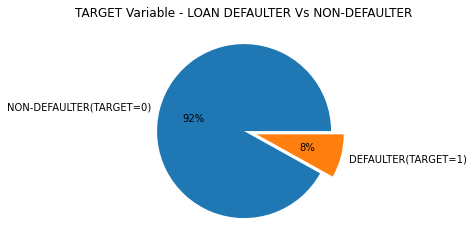

In [35]:
plt.pie(df['TARGET'].value_counts(normalize=True)*100,labels=['NON-DEFAULTER(TARGET=0)','DEFAULTER(TARGET=1)'],explode=(0,0.15),autopct='%1.f%%')
plt.title('TARGET Variable - LOAN DEFAULTER Vs NON-DEFAULTER')
plt.show()

<AxesSubplot:ylabel='TARGET'>

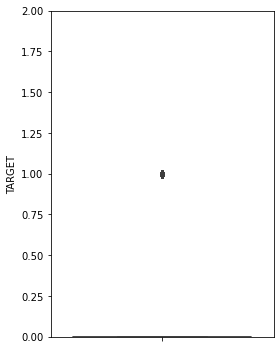

In [36]:
### checking for outliers on Target
plt.figure(figsize=(4,6))
plt.ylim(0,2)
sns.boxplot(y=df.TARGET)

In [37]:
##### We can see here that there is no outliers in Target Column
df.TARGET.describe()

count    307511.000000
mean          0.080729
std           0.272419
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max           1.000000
Name: TARGET, dtype: float64

In [38]:
df['CODE_GENDER'].value_counts(normalize=True)*100

F    65.835694
M    34.164306
Name: CODE_GENDER, dtype: float64

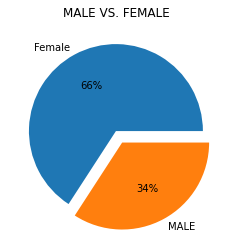

In [39]:
plt.pie(df['CODE_GENDER'].value_counts(normalize=True)*100,labels=['Female','MALE'],explode=(0,0.15),autopct='%1.f%%')
plt.title('MALE VS. FEMALE')
plt.show()

#### it shows Female applied for more loans than male


In [40]:
df['FLAG_OWN_CAR'].value_counts(normalize=True)*100

N    65.989184
Y    34.010816
Name: FLAG_OWN_CAR, dtype: float64

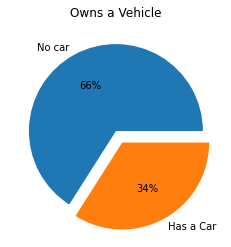

In [41]:
plt.pie(df['FLAG_OWN_CAR'].value_counts(normalize=True)*100,labels=['No car','Has a Car'],explode=(0,0.15),autopct='%1.f%%')
plt.title('Owns a Vehicle')
plt.show()

#### it shows almost 66 % of the cedit applied don't have Car


In [42]:
df['FLAG_OWN_REALTY'].value_counts(normalize=True)*100

Y    69.367275
N    30.632725
Name: FLAG_OWN_REALTY, dtype: float64

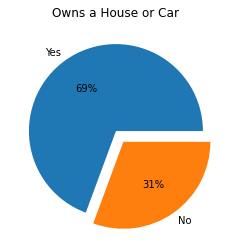

In [43]:
plt.pie(df['FLAG_OWN_REALTY'].value_counts(normalize=True)*100,labels=['Yes','No'],explode=(0,0.15),autopct='%1.f%%')
plt.title('Owns a House or Car')
plt.show()

#### It shows 69.367275 % of the applied customer own a house or car

In [44]:
df['LIVE_CITY_NOT_WORK_CITY'].value_counts(normalize=True)*100


0    82.044545
1    17.955455
Name: LIVE_CITY_NOT_WORK_CITY, dtype: float64

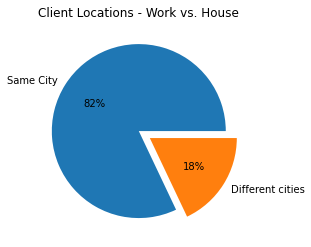

In [45]:
plt.pie(df['LIVE_CITY_NOT_WORK_CITY'].value_counts(normalize=True)*100,labels=['Same City','Different cities'],explode=(0,0.15),autopct='%1.f%%')
plt.title('Client Locations - Work vs. House')
plt.show()

##### it shows most of the applicant contact and work address is same

<AxesSubplot:ylabel='LIVE_CITY_NOT_WORK_CITY'>

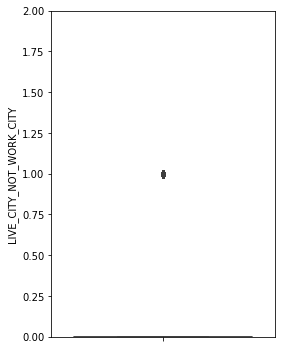

In [46]:
#### plotting the graph
plt.figure(figsize=(4,6))
plt.ylim(0,2)
sns.boxplot(y=df.LIVE_CITY_NOT_WORK_CITY)

#### We can see here that there is no outliers in LIVE_CITY_NOT_WORK_CITY


<AxesSubplot:ylabel='CNT_CHILDREN'>

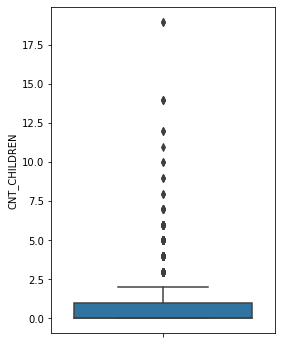

In [47]:
### plotting chart on children count

plt.figure(figsize=(4,6))
sns.boxplot(y=df.CNT_CHILDREN)

####  We can see here in CNT_CHILDREN column there are some outliers.
####  Also Maximum customers have children between 0 to 2.

<AxesSubplot:ylabel='AMT_INCOME_TOTAL'>

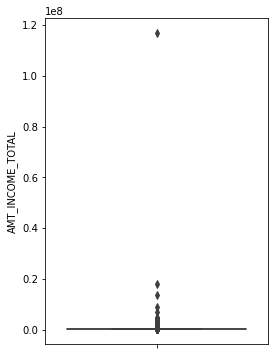

In [48]:
### Outliers check on AMT_INCOME_TOTAL 
round(df.AMT_INCOME_TOTAL,2)
df['AMT_INCOME_TOTAL']  = round(df['AMT_INCOME_TOTAL'],2)
plt.figure(figsize=(4,6))
sns.boxplot(y=df.AMT_INCOME_TOTAL)

####  Here we can see some outliers in Total Income.

In [49]:

df.AMT_INCOME_TOTAL.describe()

count    3.075110e+05
mean     1.687979e+05
std      2.371231e+05
min      2.565000e+04
25%      1.125000e+05
50%      1.471500e+05
75%      2.025000e+05
max      1.170000e+08
Name: AMT_INCOME_TOTAL, dtype: float64

<AxesSubplot:ylabel='AMT_CREDIT'>

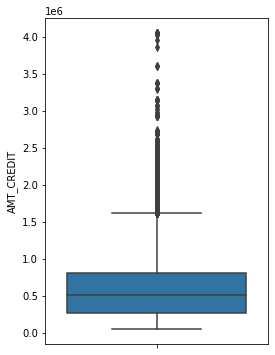

In [50]:
### Outliers check on AMT_CREDIT 
plt.figure(figsize=(4,6))
sns.boxplot(y=df.AMT_CREDIT)

#### Here we can see outliers exists in CREDIT Amount

In [51]:
### outliers check on credit amount

df.AMT_CREDIT.describe()

count    3.075110e+05
mean     5.990260e+05
std      4.024908e+05
min      4.500000e+04
25%      2.700000e+05
50%      5.135310e+05
75%      8.086500e+05
max      4.050000e+06
Name: AMT_CREDIT, dtype: float64

<AxesSubplot:ylabel='AMT_ANNUITY'>

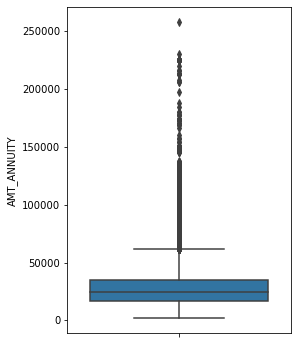

In [52]:
### Outliers check on AMT_ANNUITY 
plt.figure(figsize=(4,6))
sns.boxplot(y=df.AMT_ANNUITY)

#### There are outlier exists in ANNUITY amount.

In [53]:
df.AMT_ANNUITY.describe()

count    307511.000000
mean      27108.487841
std       14493.461065
min        1615.500000
25%       16524.000000
50%       24903.000000
75%       34596.000000
max      258025.500000
Name: AMT_ANNUITY, dtype: float64

In [54]:
#### creating bin on AMT_INCOME_TOTAL #############

def amtIncome(x):
    'divide the Income into three categories'
    if x < 100000:
        return "LowIncomeGroup"
    elif 100000 <= x < 250000:
        return "MidIncomeGroup"
    else :
        return "HighIncomeGroup"
    
df['Income_group'] = df.AMT_INCOME_TOTAL.apply(lambda x: amtIncome(x))

In [55]:
df.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,Income_group
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,-9461,-637,-3648.0,-2120,1,2,2,WEDNESDAY,10,0,0,0,0,0,0,Business Entity Type 3,MidIncomeGroup
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,State servant,Higher education,Married,House / apartment,0.003541,-16765,-1188,-1186.0,-291,2,1,1,MONDAY,11,0,0,0,0,0,0,School,HighIncomeGroup
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,Working,Secondary / secondary special,Single / not married,House / apartment,0.010032,-19046,-225,-4260.0,-2531,1,2,2,MONDAY,9,0,0,0,0,0,0,Government,LowIncomeGroup
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,Working,Secondary / secondary special,Civil marriage,House / apartment,0.008019,-19005,-3039,-9833.0,-2437,2,2,2,WEDNESDAY,17,0,0,0,0,0,0,Business Entity Type 3,MidIncomeGroup
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,Working,Secondary / secondary special,Single / not married,House / apartment,0.028663,-19932,-3038,-4311.0,-3458,1,2,2,THURSDAY,11,0,0,0,0,1,1,Religion,MidIncomeGroup


In [56]:
#### creating bin on AMT_CREDIT #############

def amtCredit(x):
    'divide the Credit amount into categories'
    if x < 150000:
        return "0-150000"
    elif 150000 <= x < 300000:
        return "150000-300000"
    elif 300000 <= x < 500000:
        return "300000-500000"
    elif 500000 <= x < 750000:
        return "500000-750000"
    elif 750000 <= x < 1000000:
        return "750000-1000000"
    elif 1000000 <= x < 1500000:
        return "1000000-1500000"
    elif 1500000 <= x <= 2000000:
        return "1500000-2000000"
    else :
        return ">2000000"
    
df['Credit_Range'] = df.AMT_CREDIT.apply(lambda x: amtCredit(x))

In [57]:
df.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,Income_group,Credit_Range
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,-9461,-637,-3648.0,-2120,1,2,2,WEDNESDAY,10,0,0,0,0,0,0,Business Entity Type 3,MidIncomeGroup,300000-500000
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,State servant,Higher education,Married,House / apartment,0.003541,-16765,-1188,-1186.0,-291,2,1,1,MONDAY,11,0,0,0,0,0,0,School,HighIncomeGroup,1000000-1500000
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,Working,Secondary / secondary special,Single / not married,House / apartment,0.010032,-19046,-225,-4260.0,-2531,1,2,2,MONDAY,9,0,0,0,0,0,0,Government,LowIncomeGroup,0-150000
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,Working,Secondary / secondary special,Civil marriage,House / apartment,0.008019,-19005,-3039,-9833.0,-2437,2,2,2,WEDNESDAY,17,0,0,0,0,0,0,Business Entity Type 3,MidIncomeGroup,300000-500000
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,Working,Secondary / secondary special,Single / not married,House / apartment,0.028663,-19932,-3038,-4311.0,-3458,1,2,2,THURSDAY,11,0,0,0,0,1,1,Religion,MidIncomeGroup,500000-750000


### Creating bin on Days of Birth and calculating AGE

In [58]:
#Days of Birth - calculate age

df['AGE']=abs(df['DAYS_BIRTH'])//365.25
df['AGE'].describe()

count    307511.000000
mean         43.405137
std          11.945779
min          20.000000
25%          33.000000
50%          43.000000
75%          53.000000
max          69.000000
Name: AGE, dtype: float64

In [59]:
#Since the AGE is placed from 20 to 69, we can create bins of 5 years starting from 20 to 70
df['AGE_GROUP'] = pd.cut(df['AGE'],bins=np.arange(20,71,5))

In [60]:
df['AGE_GROUP'].describe()

count       307510
unique          10
top       (35, 40]
freq         43760
Name: AGE_GROUP, dtype: object

In [61]:
df['AGE_GROUP'].value_counts(normalize=True)*100

(35, 40]    14.230432
(40, 45]    13.010959
(30, 35]    12.829501
(25, 30]    11.887418
(50, 55]    11.422393
(45, 50]    11.166141
(55, 60]    10.646483
(60, 65]     7.885597
(20, 25]     5.335761
(65, 70]     1.585314
Name: AGE_GROUP, dtype: float64

In [62]:
df.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,Income_group,Credit_Range,AGE,AGE_GROUP
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,-9461,-637,-3648.0,-2120,1,2,2,WEDNESDAY,10,0,0,0,0,0,0,Business Entity Type 3,MidIncomeGroup,300000-500000,25,"(20, 25]"
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,State servant,Higher education,Married,House / apartment,0.003541,-16765,-1188,-1186.0,-291,2,1,1,MONDAY,11,0,0,0,0,0,0,School,HighIncomeGroup,1000000-1500000,45,"(40, 45]"
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,Working,Secondary / secondary special,Single / not married,House / apartment,0.010032,-19046,-225,-4260.0,-2531,1,2,2,MONDAY,9,0,0,0,0,0,0,Government,LowIncomeGroup,0-150000,52,"(50, 55]"
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,Working,Secondary / secondary special,Civil marriage,House / apartment,0.008019,-19005,-3039,-9833.0,-2437,2,2,2,WEDNESDAY,17,0,0,0,0,0,0,Business Entity Type 3,MidIncomeGroup,300000-500000,52,"(50, 55]"
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,Working,Secondary / secondary special,Single / not married,House / apartment,0.028663,-19932,-3038,-4311.0,-3458,1,2,2,THURSDAY,11,0,0,0,0,1,1,Religion,MidIncomeGroup,500000-750000,54,"(50, 55]"


### Dividing the Dataset into 2 sets based on Target where Target1 is client with payment difficulties and Target0 is all other cases.


In [63]:
df_Target1 = df[df['TARGET']==1]

In [64]:
df_Target1.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,Income_group,Credit_Range,AGE,AGE_GROUP
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,-9461,-637,-3648.0,-2120,1,2,2,WEDNESDAY,10,0,0,0,0,0,0,Business Entity Type 3,MidIncomeGroup,300000-500000,25,"(20, 25]"
26,100031,1,Cash loans,F,N,Y,0,112500.0,979992.0,27076.5,Working,Secondary / secondary special,Widow,House / apartment,0.018029,-18724,-2628,-6573.0,-1827,1,3,2,MONDAY,9,0,0,0,0,0,0,Business Entity Type 3,MidIncomeGroup,750000-1000000,51,"(50, 55]"
40,100047,1,Cash loans,M,N,Y,0,202500.0,1193580.0,35028.0,Commercial associate,Secondary / secondary special,Married,House / apartment,0.025164,-17482,-1262,-1182.0,-1029,2,2,2,TUESDAY,9,0,0,0,0,0,0,Business Entity Type 3,MidIncomeGroup,1000000-1500000,47,"(45, 50]"
42,100049,1,Cash loans,F,N,N,0,135000.0,288873.0,16258.5,Working,Secondary / secondary special,Civil marriage,House / apartment,0.007305,-13384,-3597,-45.0,-4409,2,3,3,THURSDAY,11,0,0,0,0,0,0,Self-employed,MidIncomeGroup,150000-300000,36,"(35, 40]"
81,100096,1,Cash loans,F,N,Y,0,81000.0,252000.0,14593.5,Pensioner,Secondary / secondary special,Married,House / apartment,0.028663,-24794,365243,-5391.0,-4199,2,2,2,THURSDAY,10,0,0,0,0,0,0,XNA,LowIncomeGroup,150000-300000,67,"(65, 70]"


In [65]:
df_Target0 = df[df['TARGET']==0]

In [66]:
df_Target0.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,Income_group,Credit_Range,AGE,AGE_GROUP
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,State servant,Higher education,Married,House / apartment,0.003541,-16765,-1188,-1186.0,-291,2,1,1,MONDAY,11,0,0,0,0,0,0,School,HighIncomeGroup,1000000-1500000,45,"(40, 45]"
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,Working,Secondary / secondary special,Single / not married,House / apartment,0.010032,-19046,-225,-4260.0,-2531,1,2,2,MONDAY,9,0,0,0,0,0,0,Government,LowIncomeGroup,0-150000,52,"(50, 55]"
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,Working,Secondary / secondary special,Civil marriage,House / apartment,0.008019,-19005,-3039,-9833.0,-2437,2,2,2,WEDNESDAY,17,0,0,0,0,0,0,Business Entity Type 3,MidIncomeGroup,300000-500000,52,"(50, 55]"
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,Working,Secondary / secondary special,Single / not married,House / apartment,0.028663,-19932,-3038,-4311.0,-3458,1,2,2,THURSDAY,11,0,0,0,0,1,1,Religion,MidIncomeGroup,500000-750000,54,"(50, 55]"
5,100008,0,Cash loans,M,N,Y,0,99000.0,490495.5,27517.5,State servant,Secondary / secondary special,Married,House / apartment,0.035792,-16941,-1588,-4970.0,-477,2,2,2,WEDNESDAY,16,0,0,0,0,0,0,Other,LowIncomeGroup,300000-500000,46,"(45, 50]"


## Univariate Analysis ( Continous ) 

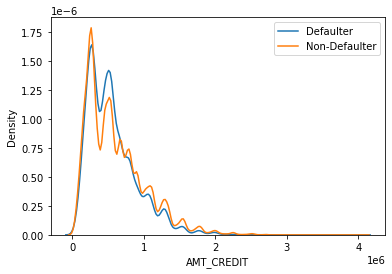

In [67]:
import warnings
warnings.filterwarnings("ignore")

sns.distplot(df_Target1['AMT_CREDIT'],hist=False,label="Defaulter")
sns.distplot(df_Target0['AMT_CREDIT'],hist=False,label="Non-Defaulter")
plt.legend()


#### Here we can see that with low credit amount the defaulter rate is higher than high Amount credit .

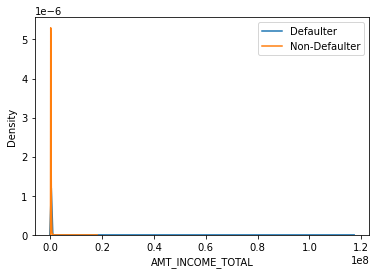

In [68]:
sns.distplot(df_Target1['AMT_INCOME_TOTAL'],hist=False,label="Defaulter")
sns.distplot(df_Target0['AMT_INCOME_TOTAL'],hist=False,label="Non-Defaulter")
plt.legend()

#### here we can see that defaulter rate low in less income customer and getting slighly high with income rises.

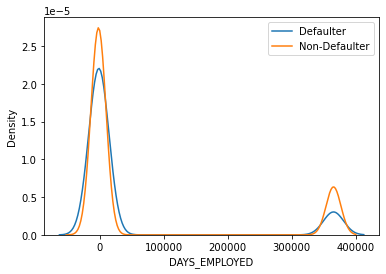

In [69]:
sns.distplot(df_Target1['DAYS_EMPLOYED'],hist=False,label="Defaulter")
sns.distplot(df_Target0['DAYS_EMPLOYED'],hist=False,label="Non-Defaulter")
plt.legend()

#### This shows the loan defaulter rate lesser when current working period increase. 

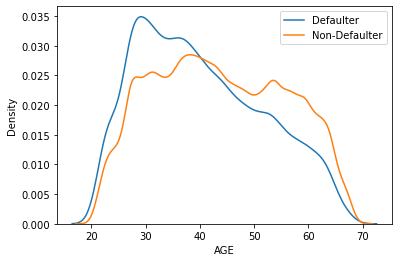

In [70]:
### analysins on AGE

sns.distplot(df_Target1['AGE'],hist=False,label="Defaulter")
sns.distplot(df_Target0['AGE'],hist=False,label="Non-Defaulter")
plt.legend()

#### The above graph shows that age closer to 30 (Ranging 25 to 35) has most loan defaulter.

## Univariate Analysis ( Categorical ) 

<AxesSubplot:title={'center':'Non-Defaulter'}, xlabel='CODE_GENDER', ylabel='count'>

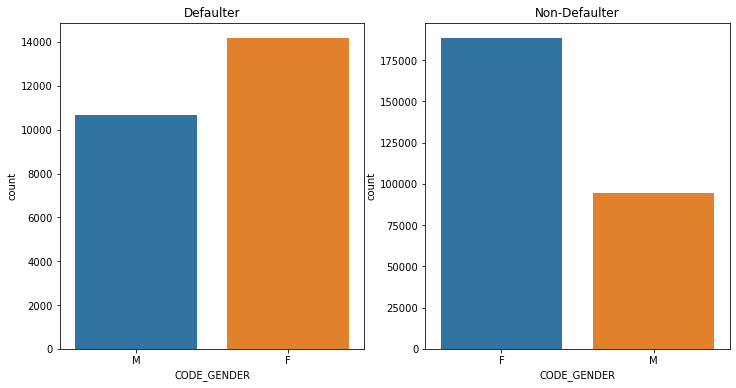

In [71]:
plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
plt.title('Defaulter')
sns.countplot(x='CODE_GENDER',data=df_Target1)
plt.subplot(1,2,2)
plt.title('Non-Defaulter')
sns.countplot(x='CODE_GENDER',data=df_Target0)

#### We can see here that female applied more loan than male. 
#### Also comparing the 2 graphs, male percentage defaulter is more than female.

<AxesSubplot:title={'center':'Non-Defaulter'}, xlabel='Income_group', ylabel='count'>

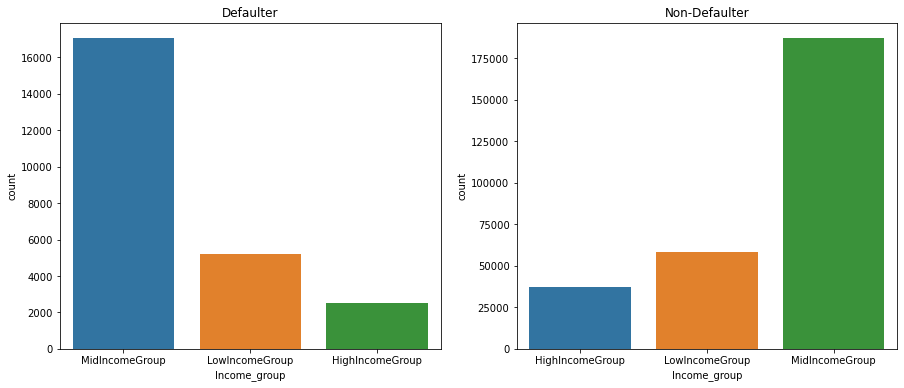

In [72]:
plt.figure(figsize=(15,6))
plt.subplot(1,2,1)
plt.title('Defaulter')
sns.countplot(x='Income_group',data=df_Target1)
plt.subplot(1,2,2)
plt.title('Non-Defaulter')
sns.countplot(x='Income_group',data=df_Target0)


### Here we can say that middle income group (earning between 100000-250000) has most defaulter and maximum loan appliad also Middle Income group .

### High income group is lesser defaulter.

### Low Income group has slightly risk of being defaulter.

<AxesSubplot:title={'center':'Non-Defaulter'}, xlabel='Credit_Range', ylabel='count'>

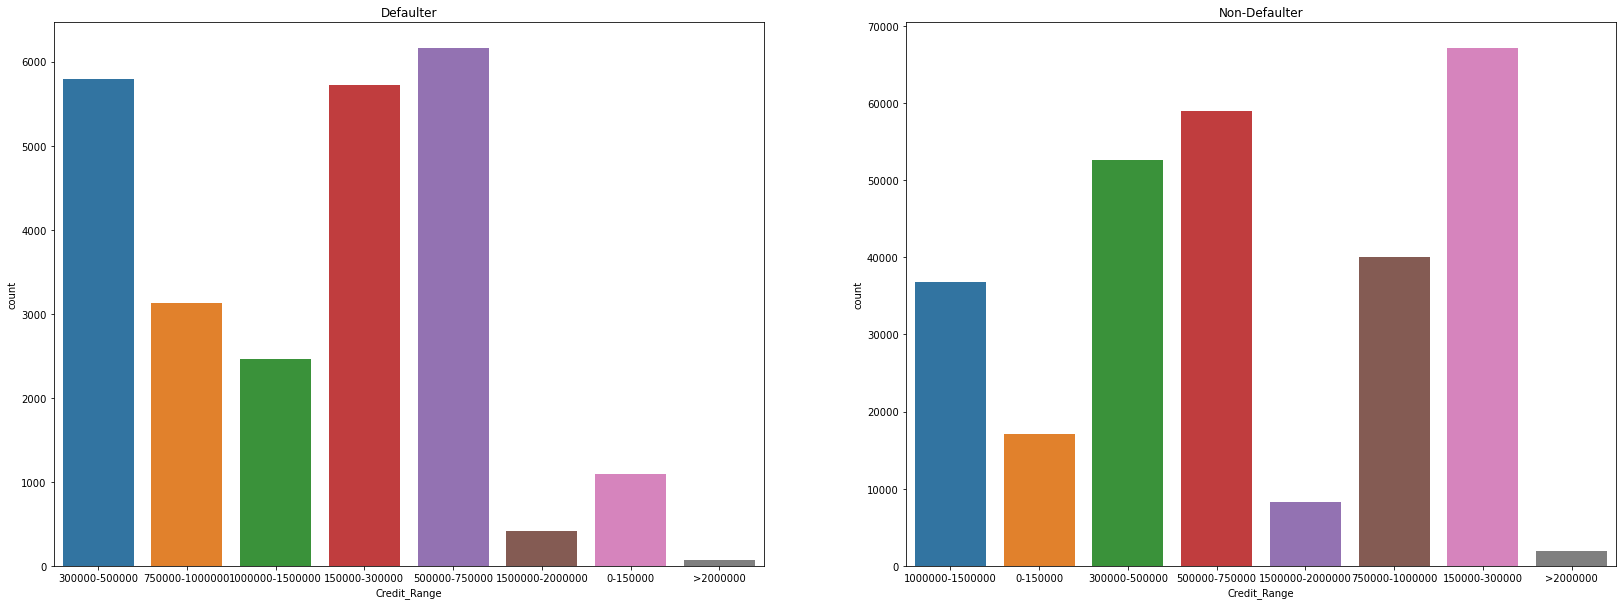

In [73]:
plt.figure(figsize=(28,10))
plt.subplot(1,2,1)
plt.title('Defaulter')
sns.countplot(x='Credit_Range',data=df_Target1)
plt.subplot(1,2,2)
plt.title('Non-Defaulter')
sns.countplot(x='Credit_Range',data=df_Target0)

#### From this analysis we can identify that credit amount between range 500000-750000 has more risk of being defaulter.

#### Credit amount range between 150000-300000 has lesser risk of being Defaulter.

#### --------------------------------------------------------------------
### Showing data against ORGANIZATION_TYPE

<AxesSubplot:title={'center':'Defaulter'}, xlabel='count', ylabel='ORGANIZATION_TYPE'>

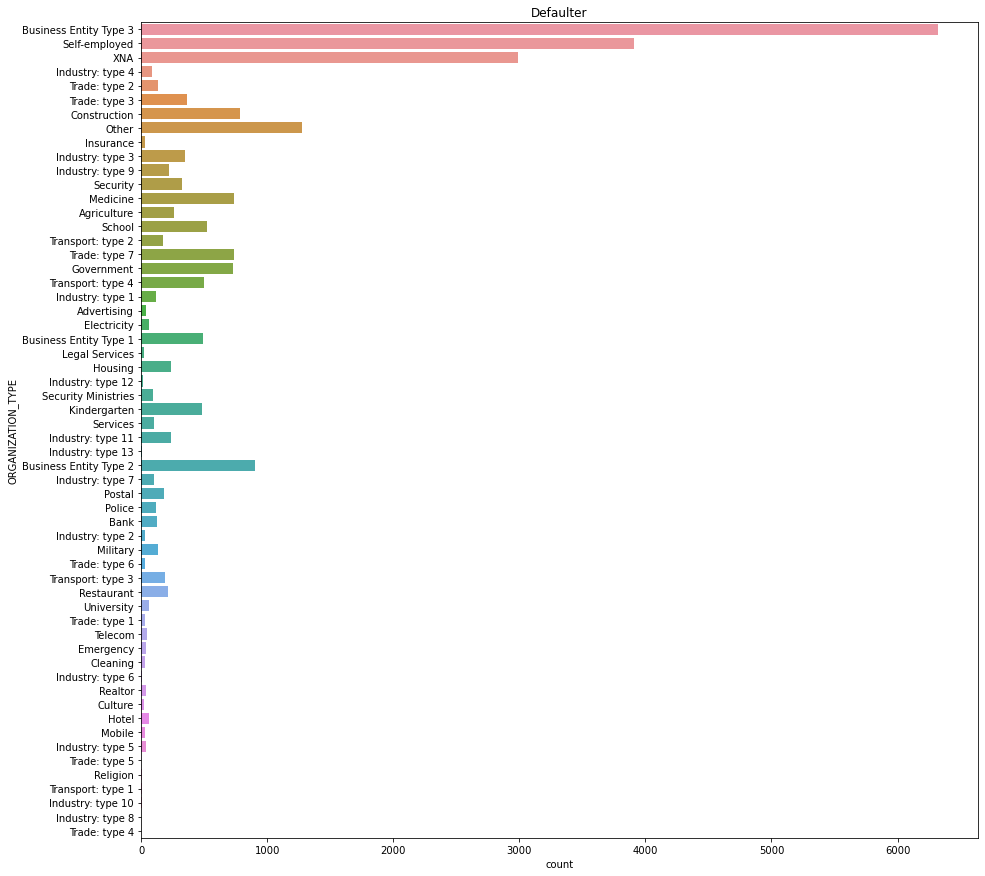

In [74]:
plt.figure(figsize=(15,15))
plt.title('Defaulter')
sns.countplot(y='ORGANIZATION_TYPE',data=df_Target1)


<AxesSubplot:title={'center':'Non-Defaulter'}, xlabel='count', ylabel='ORGANIZATION_TYPE'>

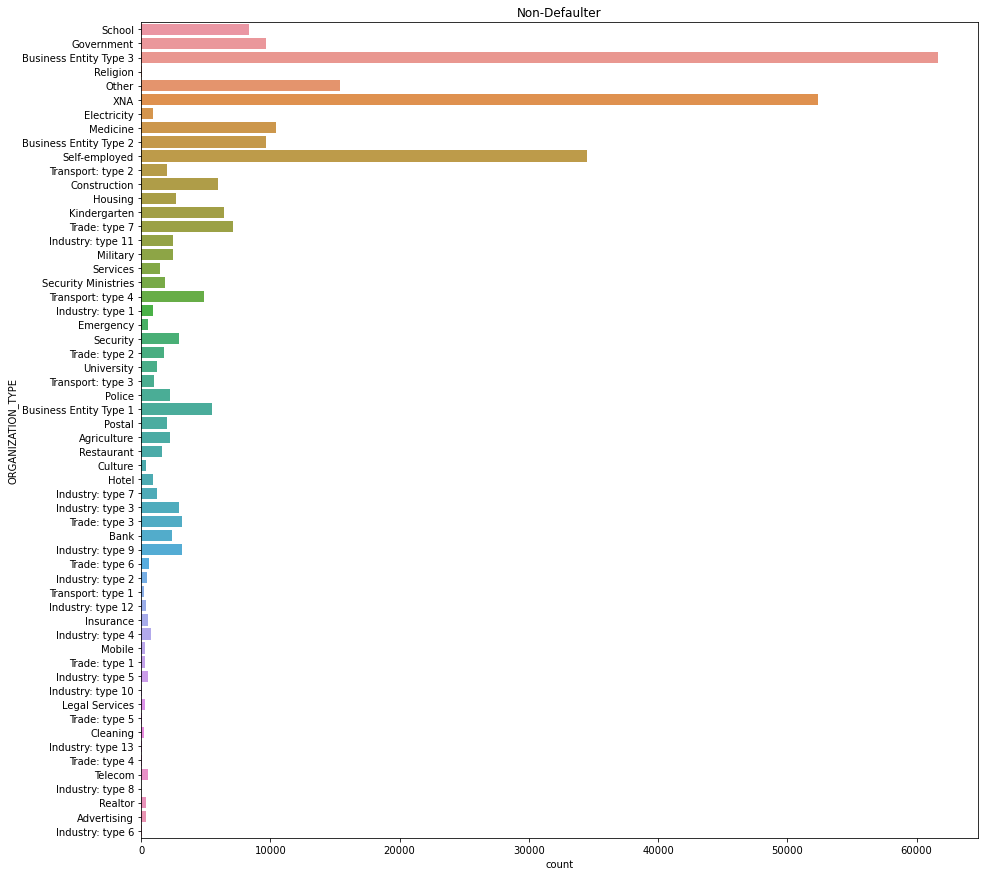

In [75]:
plt.figure(figsize=(15,15))
plt.title('Non-Defaulter')
sns.countplot(y='ORGANIZATION_TYPE',data=df_Target0)

#### Here we can conclude that 'Business entity type 3' applied most loans and having more defaulters.

#### Self-employed also have much chance to being defaulter.

#### 'School' and 'Government' ORGANIZATION_TYPE has less chance of being Defaulter .

#### ------------------------------------------
### Showing data on AGE group

<AxesSubplot:title={'center':'Defaulter'}, xlabel='count', ylabel='AGE'>

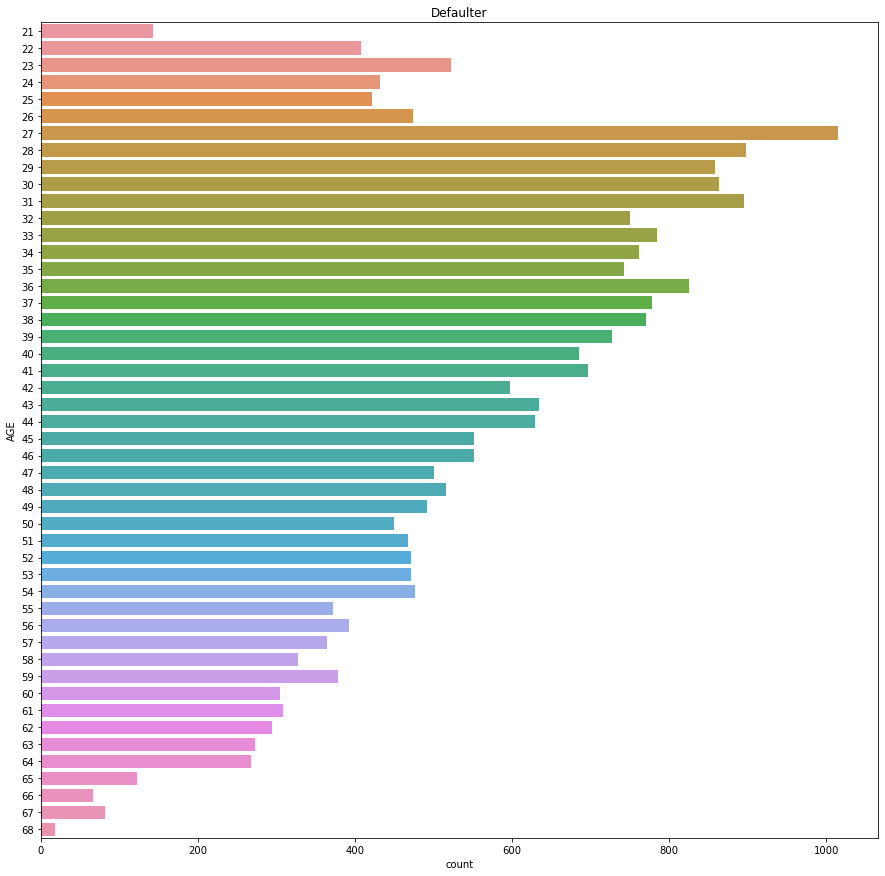

In [76]:
plt.figure(figsize=(15,15))
plt.title('Defaulter')
sns.countplot(y='AGE',data=df_Target1)

<AxesSubplot:title={'center':'Defaulter'}, xlabel='count', ylabel='AGE_GROUP'>

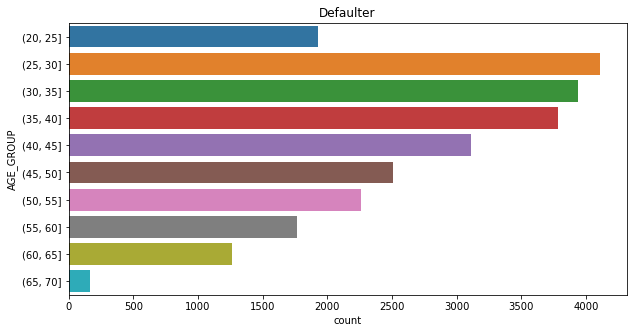

In [77]:
plt.figure(figsize=(10,5))
plt.title('Defaulter')
sns.countplot(y='AGE_GROUP',data=df_Target1)

#### from the above we can see that age 27 having more defaulter and age 38 having more non defaulter.

<AxesSubplot:title={'center':'Defaulter'}, xlabel='count', ylabel='AGE_GROUP'>

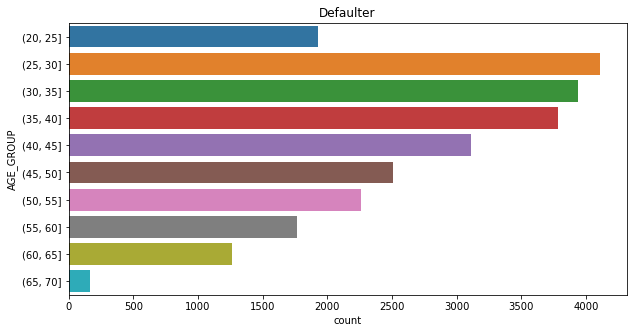

In [78]:
plt.figure(figsize=(10,5))
plt.title('Defaulter')
sns.countplot(y='AGE_GROUP',data=df_Target1)

<AxesSubplot:title={'center':'Defaulter'}, xlabel='NAME_INCOME_TYPE', ylabel='count'>

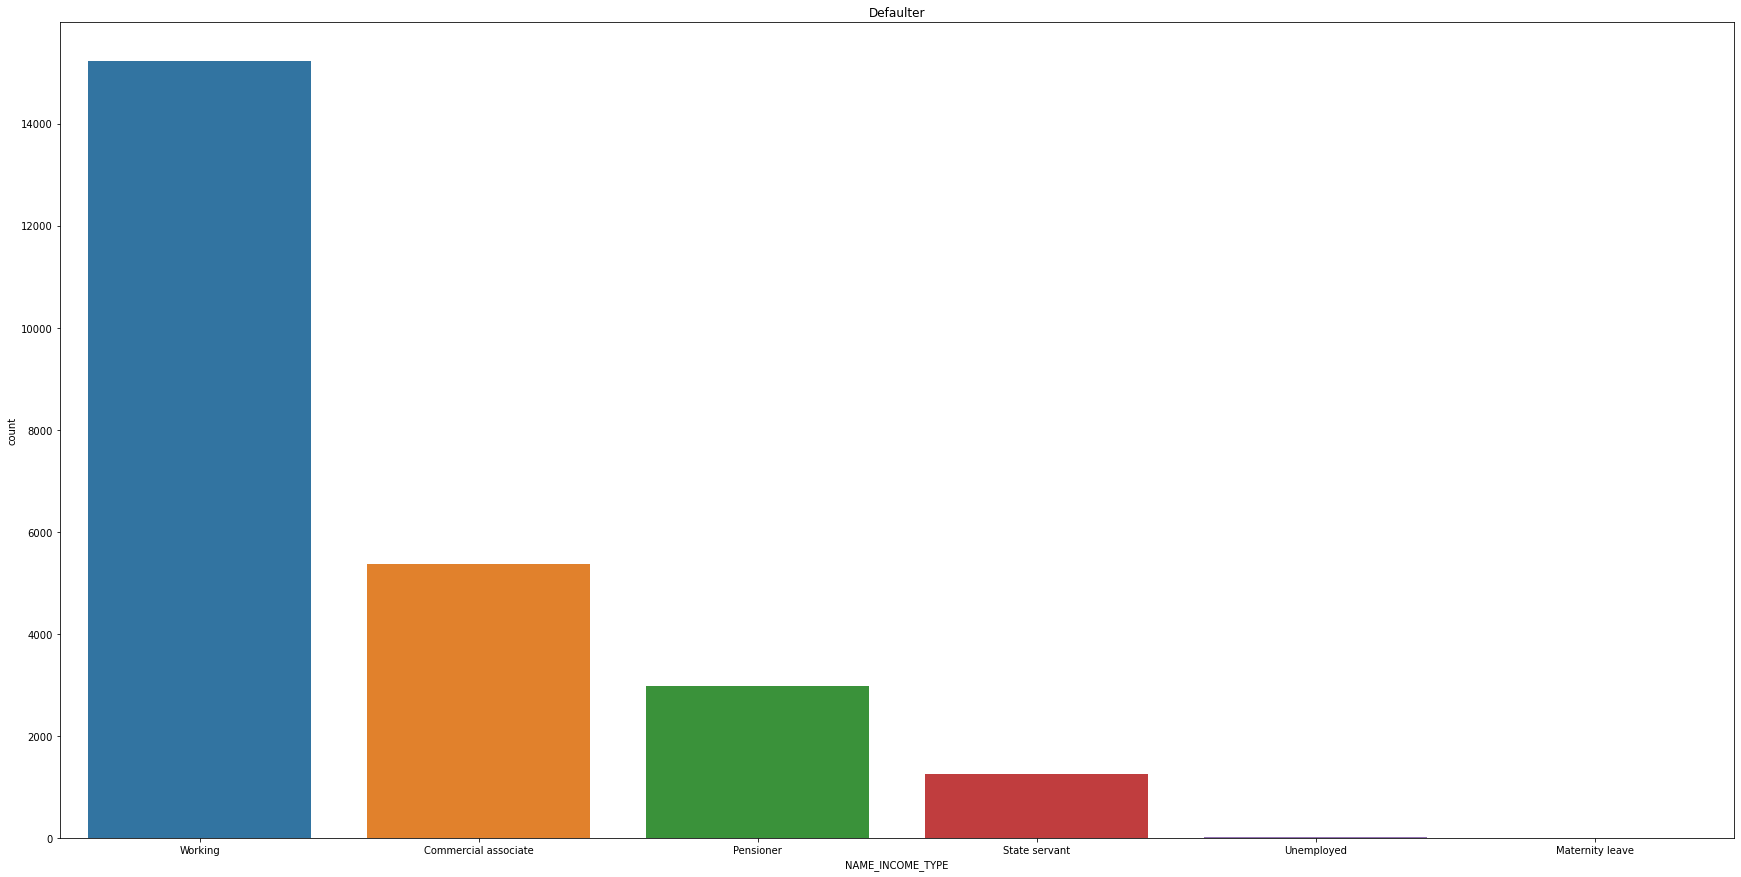

In [79]:
#### ploting data on income group

plt.figure(figsize=(30,15))
plt.title('Defaulter')
sns.countplot(x='NAME_INCOME_TYPE',data=df_Target1)


<AxesSubplot:title={'center':'Non-Defaulter'}, xlabel='NAME_INCOME_TYPE', ylabel='count'>

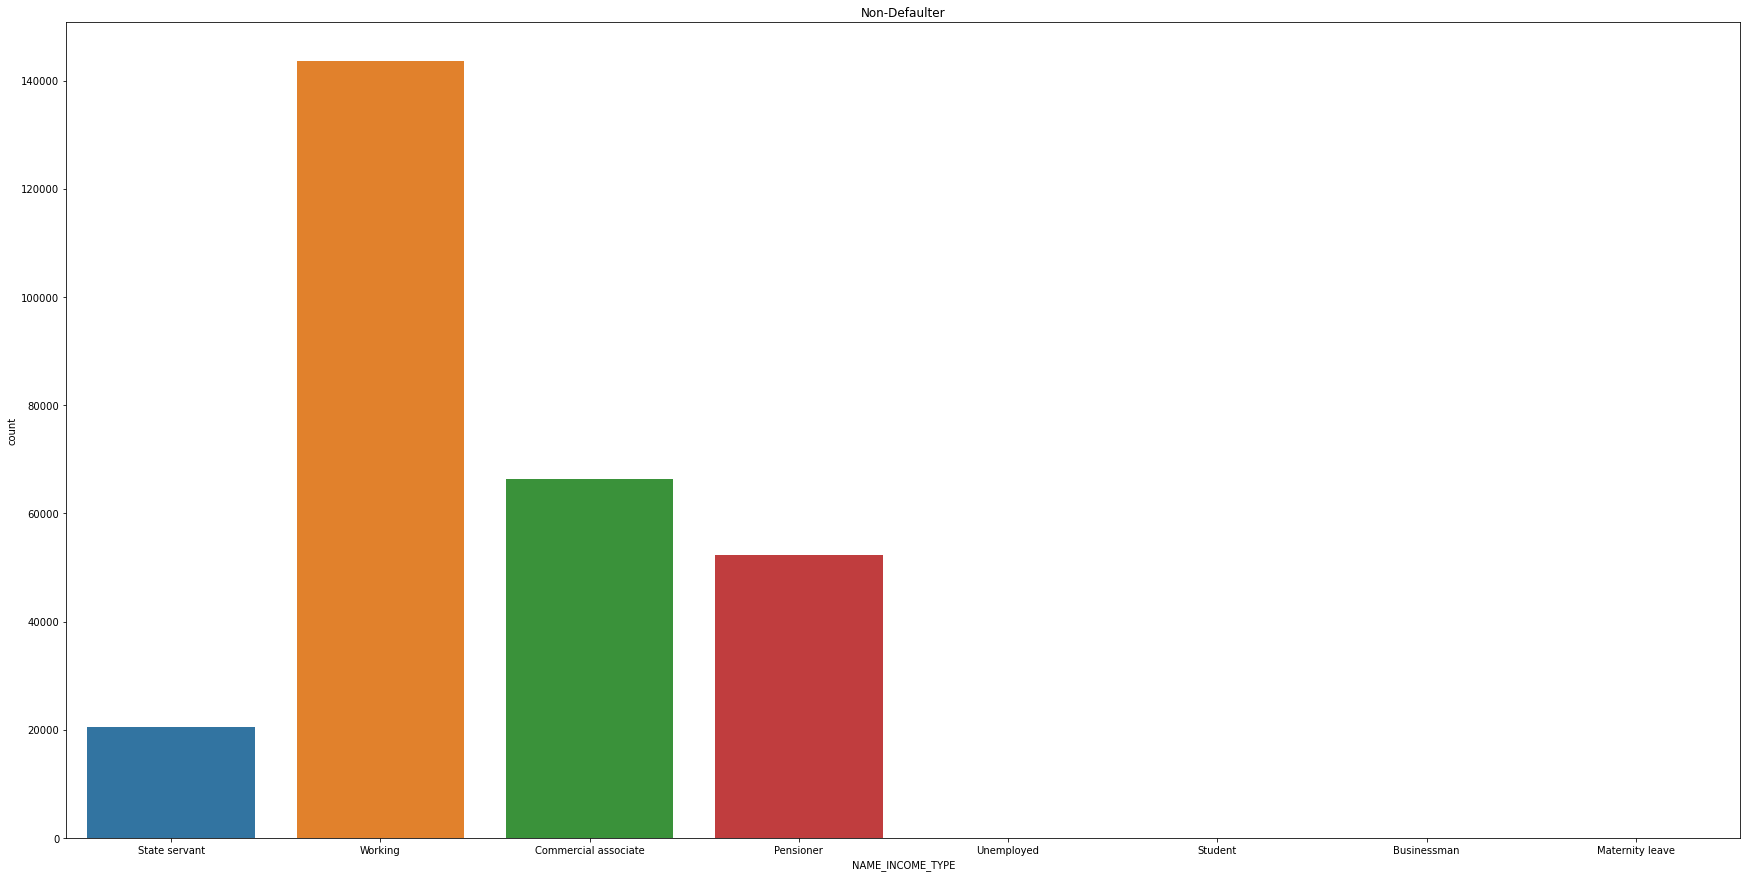

In [80]:
plt.figure(figsize=(30,15))
plt.title('Non-Defaulter')
sns.countplot(x='NAME_INCOME_TYPE',data=df_Target0)

#### We can see here that State servent, commercial Pensioner has more chance for being non-defaulter.
#### Working applied for highest loans.

In [81]:
df['NAME_INCOME_TYPE'].value_counts()

Working                 158774
Commercial associate     71617
Pensioner                55362
State servant            21703
Unemployed                  22
Student                     18
Businessman                 10
Maternity leave              5
Name: NAME_INCOME_TYPE, dtype: int64

<AxesSubplot:title={'center':'Non-Defaulter'}, xlabel='NAME_FAMILY_STATUS', ylabel='count'>

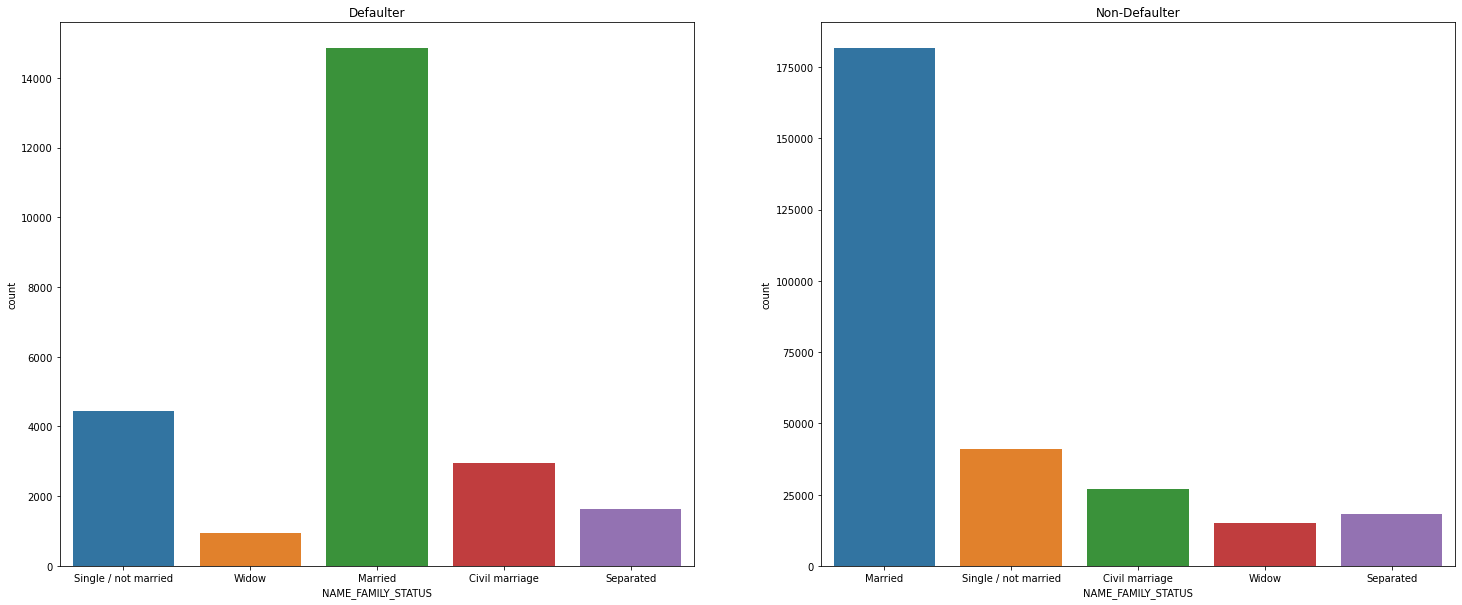

In [82]:
#### Plotting data for family status

plt.figure(figsize=(25,10))
plt.subplot(1,2,1)
plt.title('Defaulter')
sns.countplot(x='NAME_FAMILY_STATUS',data=df_Target1)
plt.subplot(1,2,2)
plt.title('Non-Defaulter')
sns.countplot(x='NAME_FAMILY_STATUS',data=df_Target0)

In [83]:
#### from the above we can see Married applied for more loans and having more chances 


#### --------------------------------------------
### Bivariate Analysis (Continous Continous)

<AxesSubplot:title={'center':'Non-Defaulter'}, xlabel='AMT_INCOME_TOTAL', ylabel='AMT_CREDIT'>

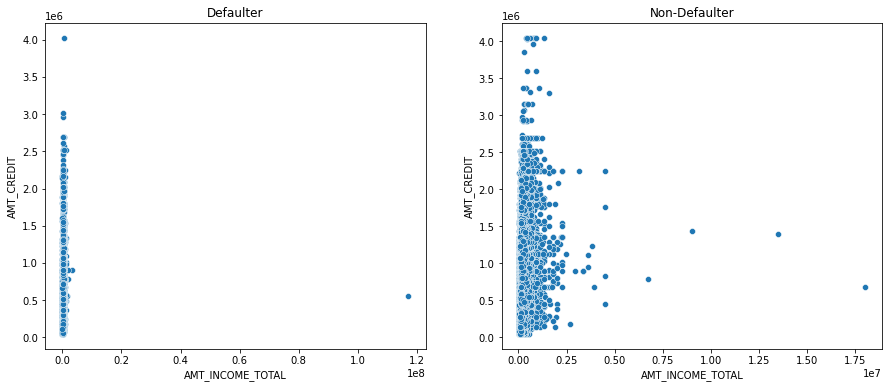

In [84]:
plt.figure(figsize=(15,6))
plt.subplot(1,2,1)
plt.title('Defaulter')
sns.scatterplot(data=df_Target1, x="AMT_INCOME_TOTAL", y="AMT_CREDIT")
plt.subplot(1,2,2)
plt.title('Non-Defaulter')
sns.scatterplot(data=df_Target0, x="AMT_INCOME_TOTAL", y="AMT_CREDIT")

#### We can see here most of the credit request came from less income clients.

In [85]:
###Correlation on overall data

corr = df.corr()
corr.style.background_gradient(cmap='coolwarm')

,SK_ID_CURR,TARGET,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,AGE
SK_ID_CURR,1.000000,-0.002108,-0.001129,-0.001820,-0.000343,-0.000431,0.000849,-0.001500,0.001366,-0.000973,-0.000384,-0.002895,-0.001075,-0.001138,0.000350,-0.000283,0.001097,0.002903,-0.001885,-0.001582,0.000067,0.001440
TARGET,-0.002108,1.000000,0.019187,-0.003982,-0.030369,-0.012815,-0.037227,0.078239,-0.044932,0.041975,0.051457,0.009308,0.058899,0.060893,-0.024166,0.005576,0.006942,0.002819,0.044395,0.050994,0.032518,-0.078198
CNT_CHILDREN,-0.001129,0.019187,1.000000,0.012882,0.002145,0.021377,-0.025573,0.330938,-0.239818,0.183395,-0.028019,0.879160,0.025423,0.024781,-0.007292,-0.013319,0.008185,0.014835,0.020072,0.070650,0.069957,-0.330876
AMT_INCOME_TOTAL,-0.001820,-0.003982,0.012882,1.000000,0.156870,0.191657,0.074796,0.027261,-0.064223,0.027805,0.008506,0.016341,-0.085465,-0.091735,0.036459,0.031191,0.062340,0.058059,0.003574,0.006431,0.008285,-0.027270
AMT_CREDIT,-0.000343,-0.030369,0.002145,0.156870,1.000000,0.770127,0.099738,-0.055436,-0.066838,0.009621,-0.006575,0.063160,-0.101776,-0.110915,0.052738,0.024010,0.051929,0.052609,-0.026886,-0.018856,0.000081,0.055462
AMT_ANNUITY,-0.000431,-0.012815,0.021377,0.191657,0.770127,1.000000,0.118418,0.009443,-0.104329,0.038514,0.011267,0.075541,-0.128516,-0.141674,0.052265,0.041291,0.079403,0.074530,-0.006217,0.000894,0.010080,-0.009448
REGION_POPULATION_RELATIVE,0.000849,-0.037227,-0.025573,0.074796,0.099738,0.118418,1.000000,-0.029582,-0.003980,-0.053820,-0.003993,-0.024209,-0.532877,-0.531535,0.171285,0.002118,0.056944,0.081016,-0.050499,-0.044057,-0.015188,0.029631
DAYS_BIRTH,-0.001500,0.078239,0.330938,0.027261,-0.055436,0.009443,-0.029582,1.000000,-0.615864,0.331912,0.272691,0.278892,0.009361,0.008073,0.091064,0.065486,0.095819,0.069567,0.180382,0.242401,0.158882,-0.999712
DAYS_EMPLOYED,0.001366,-0.044932,-0.239818,-0.064223,-0.066838,-0.104329,-0.003980,-0.615864,1.000000,-0.210242,-0.272378,-0.233549,0.032750,0.034624,-0.091138,-0.035803,-0.107150,-0.095539,-0.090516,-0.254559,-0.218101,0.615827
DAYS_REGISTRATION,-0.000973,0.041975,0.183395,0.027805,0.009621,0.038514,-0.053820,0.331912,-0.210242,1.000000,0.101896,0.173415,0.080210,0.074038,-0.010908,0.028213,0.036787,0.027560,0.064334,0.099874,0.072658,-0.331783


In [86]:
###Correlation on Target1 data

corr = df_Target1.corr()
corr.style.background_gradient(cmap='coolwarm')

,SK_ID_CURR,TARGET,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,AGE
SK_ID_CURR,1.000000,nan,-0.005144,-0.010165,-0.001290,-0.007578,0.006301,-0.001254,-0.005151,0.006342,-0.002539,-0.003816,-0.005936,-0.004135,0.005004,-0.004249,0.004120,0.004303,0.008328,0.000787,-0.002929,0.001170
TARGET,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
CNT_CHILDREN,-0.005144,nan,1.000000,0.004796,-0.001675,0.031257,-0.031975,0.259109,-0.191942,0.149154,-0.032299,0.885484,0.040680,0.043185,-0.023899,-0.024322,-0.020793,-0.012073,-0.001174,0.046115,0.053515,-0.259124
AMT_INCOME_TOTAL,-0.010165,nan,0.004796,1.000000,0.038131,0.046421,0.009135,0.003096,-0.014979,0.000158,-0.004215,0.006654,-0.021486,-0.022808,0.013775,0.007577,0.014531,0.013409,-0.002223,-0.003019,-0.001353,-0.003145
AMT_CREDIT,-0.001290,nan,-0.001675,0.038131,1.000000,0.752195,0.069161,-0.135316,-0.000968,-0.025854,-0.052329,0.051224,-0.059193,-0.071377,0.031782,0.019540,0.033260,0.033554,-0.033034,-0.037720,-0.016509,0.135166
AMT_ANNUITY,-0.007578,nan,0.031257,0.046421,0.752195,1.000000,0.071690,-0.014303,-0.082552,0.034279,-0.016767,0.075711,-0.073784,-0.089291,0.031236,0.034807,0.066565,0.064109,-0.005745,0.001997,0.009902,0.014063
REGION_POPULATION_RELATIVE,0.006301,nan,-0.031975,0.009135,0.069161,0.071690,1.000000,-0.048190,0.015103,-0.056222,-0.015537,-0.030163,-0.443236,-0.446977,0.142744,-0.022129,0.022256,0.046059,-0.059718,-0.052369,-0.020428,0.047979
DAYS_BIRTH,-0.001254,nan,0.259109,0.003096,-0.135316,-0.014303,-0.048190,1.000000,-0.575097,0.289114,0.252863,0.203267,0.033928,0.033631,0.062172,0.054654,0.069564,0.045517,0.161858,0.215192,0.123623,-0.999691
DAYS_EMPLOYED,-0.005151,nan,-0.191942,-0.014979,-0.000968,-0.082552,0.015103,-0.575097,1.000000,-0.188929,-0.226470,-0.186561,0.003679,0.002992,-0.059997,-0.033331,-0.088954,-0.077201,-0.084961,-0.242019,-0.196453,0.575221
DAYS_REGISTRATION,0.006342,nan,0.149154,0.000158,-0.025854,0.034279,-0.056222,0.289114,-0.188929,1.000000,0.096833,0.145828,0.103855,0.100285,-0.032518,0.020403,0.021183,0.015547,0.048585,0.088427,0.062636,-0.289104


In [87]:
###Correlation on Target0 data
corr = df_Target0.corr()
corr.style.background_gradient(cmap='coolwarm')

,SK_ID_CURR,TARGET,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,AGE
SK_ID_CURR,1.000000,nan,-0.000716,0.001739,-0.000342,0.000071,0.000360,-0.001346,0.001744,-0.001475,-0.000077,-0.002789,-0.000519,-0.000739,-0.000115,0.000104,0.000836,0.002784,-0.002885,-0.001696,0.000428,0.001288
TARGET,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
CNT_CHILDREN,-0.000716,nan,1.000000,0.027397,0.003081,0.020909,-0.024363,0.336966,-0.243356,0.185792,-0.028751,0.878571,0.022842,0.021866,-0.005244,-0.012342,0.010857,0.017326,0.021587,0.072193,0.070988,-0.336896
AMT_INCOME_TOTAL,0.001739,nan,0.027397,1.000000,0.342799,0.418948,0.167851,0.062609,-0.141250,0.064937,0.022896,0.034254,-0.186573,-0.200466,0.076743,0.068510,0.137174,0.127701,0.010567,0.017618,0.020684,-0.062601
AMT_CREDIT,-0.000342,nan,0.003081,0.342799,1.000000,0.771297,0.100604,-0.047378,-0.072515,0.013477,-0.001464,0.064536,-0.103337,-0.112238,0.053619,0.024617,0.053735,0.054250,-0.025036,-0.015703,0.002506,0.047419
AMT_ANNUITY,0.000071,nan,0.020909,0.418948,0.771297,1.000000,0.120977,0.012260,-0.106421,0.039435,0.014111,0.075789,-0.132120,-0.145144,0.053584,0.041983,0.080646,0.075464,-0.005679,0.001516,0.010577,-0.012247
REGION_POPULATION_RELATIVE,0.000360,nan,-0.024363,0.167851,0.100604,0.120977,1.000000,-0.025244,-0.006961,-0.052083,-0.001071,-0.023425,-0.539005,-0.537301,0.172814,0.004306,0.060086,0.083965,-0.048217,-0.041516,-0.013502,0.025314
DAYS_BIRTH,-0.001346,nan,0.336966,0.062609,-0.047378,0.012260,-0.025244,1.000000,-0.618048,0.333151,0.271314,0.285823,0.002332,0.000780,0.095916,0.066252,0.097908,0.071648,0.179772,0.241904,0.160072,-0.999711
DAYS_EMPLOYED,0.001744,nan,-0.243356,-0.141250,-0.072515,-0.106421,-0.006961,-0.618048,1.000000,-0.210187,-0.274290,-0.237412,0.037851,0.040028,-0.094844,-0.035854,-0.108539,-0.097022,-0.089586,-0.254453,-0.219190,0.617997
DAYS_REGISTRATION,-0.001475,nan,0.185792,0.064937,0.013477,0.039435,-0.052083,0.333151,-0.210187,1.000000,0.100236,0.175629,0.075846,0.069357,-0.008044,0.028700,0.037870,0.028475,0.064216,0.098919,0.072248,-0.333012


### From the above Correlation analysis on all the data we can conclude the below corelations :

##### 1. If Children count increase, Family count will increase.
##### 2. Amount Credit decrease based on Birth date.Means Young clients can avail more credit amount than older.
##### 3. If Annuity amount increase, credit amount will increase.
##### 4. Income amount depends on the Regions, Live in city and work city.
##### 5. Income Amount depends on Employed days. If Employed days increases, Income amount also increases.

<AxesSubplot:title={'center':'Non-Defaulter'}, xlabel='Income_group', ylabel='AMT_CREDIT'>

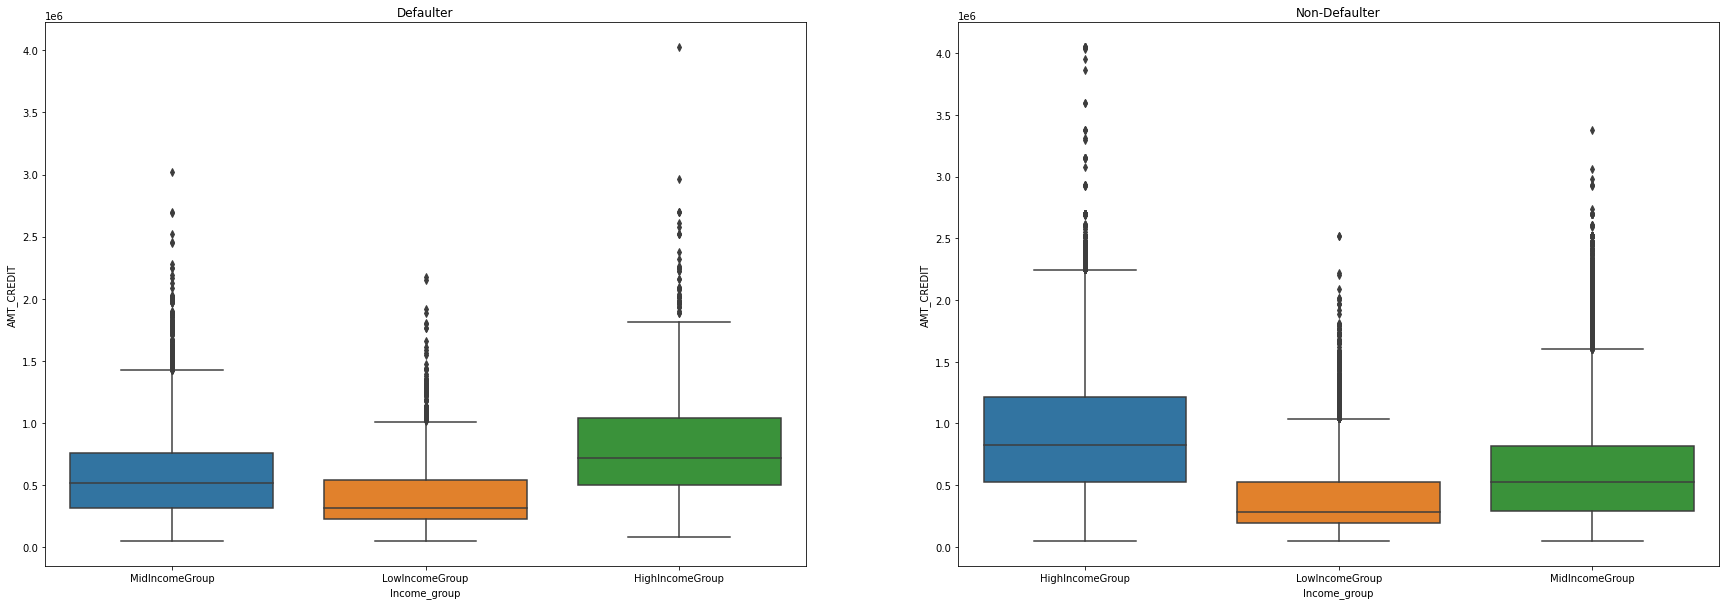

In [88]:
### Bivariate Categorical Continous Analysis ########

plt.figure(figsize=(30,10))
plt.subplot(1,2,1)
plt.title('Defaulter')

sns.boxplot( x="Income_group", y="AMT_CREDIT",data=df_Target1)
plt.subplot(1,2,2)
plt.title('Non-Defaulter')
sns.boxplot( x="Income_group", y="AMT_CREDIT",data=df_Target0)

#### We can see from the above analysis that low income group have almost same chances of being defaulter or non defaulter.
#### Mid income group have slighly high chance for being non defaulter.
#### High income group have less chance of being non-defaulter.

<AxesSubplot:title={'center':'Defaulter'}, xlabel='Credit_Range', ylabel='count'>

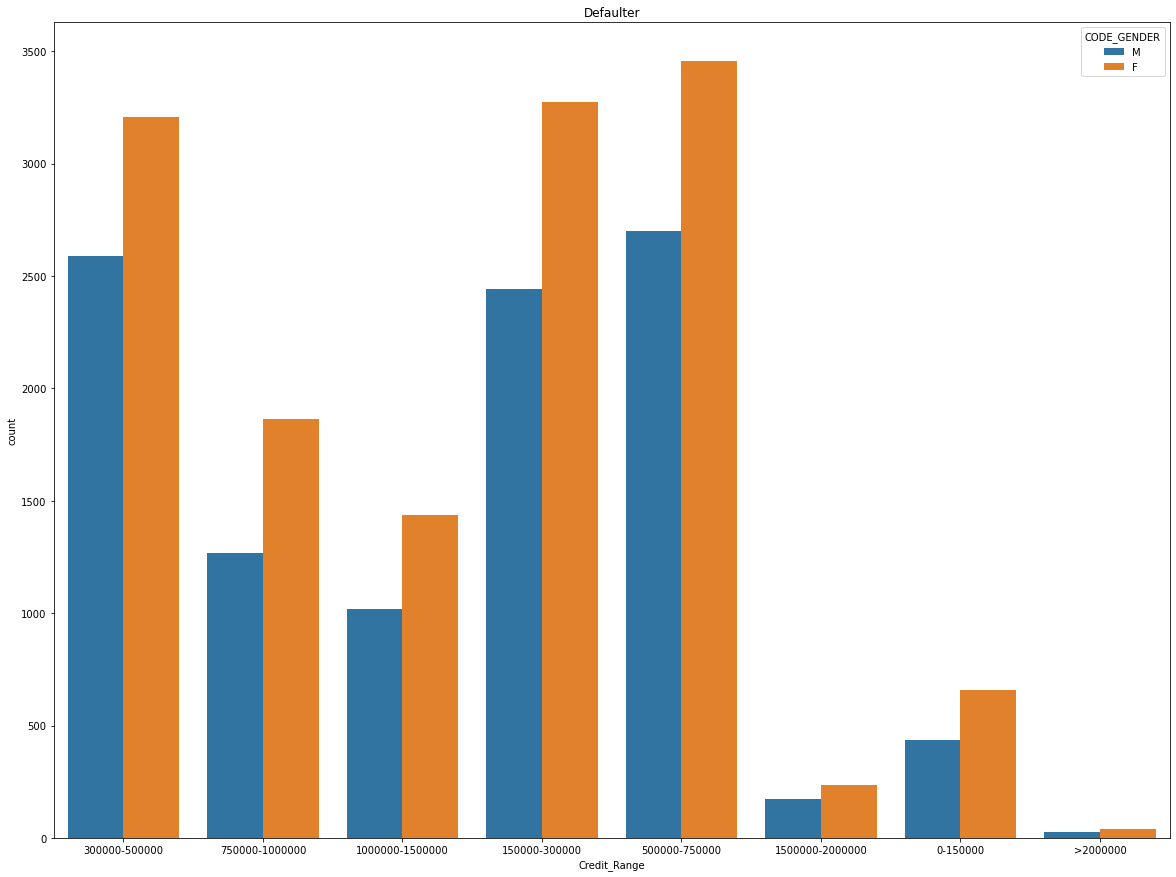

In [89]:
#Bivariate Categorical Categorical ########

plt.figure(figsize=(20,15))
plt.title('Defaulter')
sns.countplot(x='Credit_Range',hue='CODE_GENDER',data=df_Target1)


<AxesSubplot:title={'center':'Non-Defaulter'}, xlabel='Credit_Range', ylabel='count'>

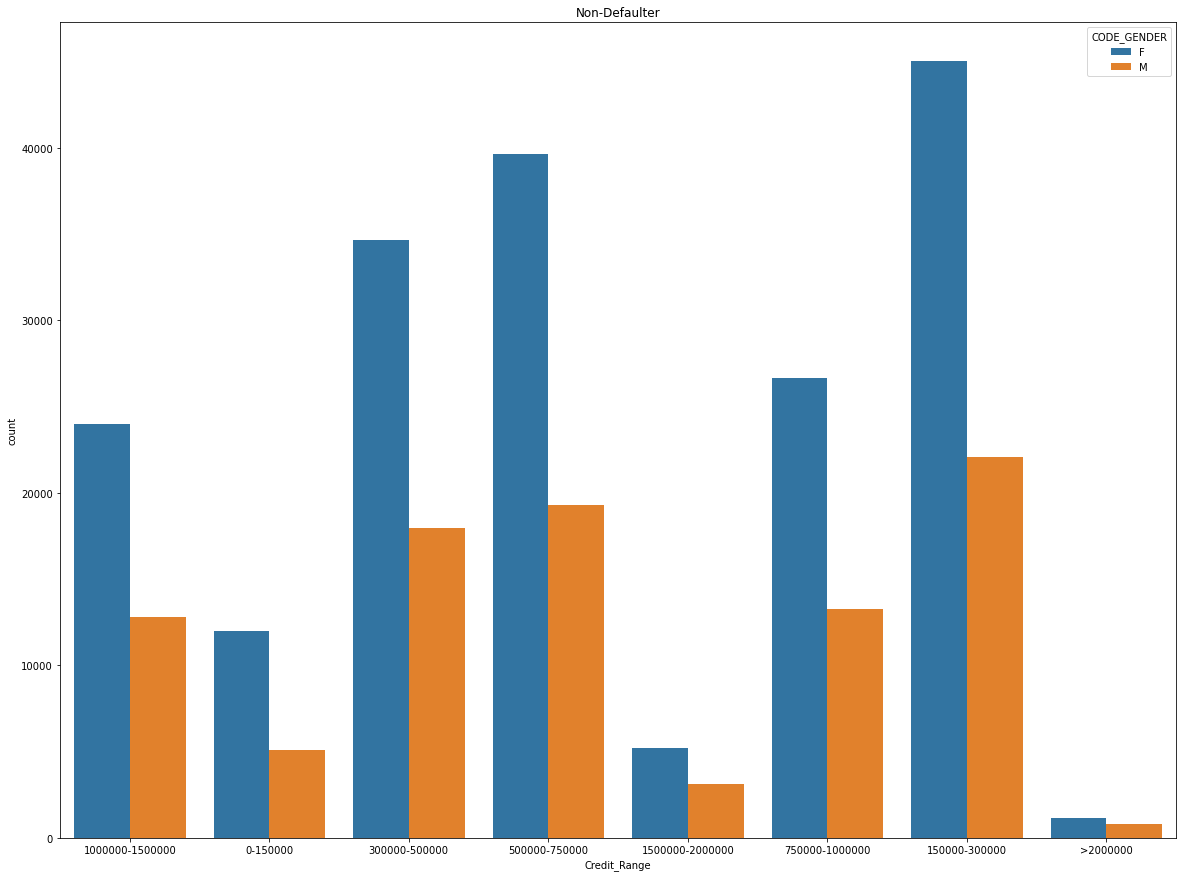

In [90]:
plt.figure(figsize=(20,15))
plt.title('Non-Defaulter')
sns.countplot(x='Credit_Range',hue='CODE_GENDER',data=df_Target0)

#### from the above analysis, we can conclude that Females applied more than male.
#### Male Credit Ranging 150000-300000 having more non defaulter.
#### overall male are more non defaulter where female are more in defaulter.

### Reading previous_application.csv file

In [91]:
predata=pd.read_csv("previous_application.csv")

pd.set_option('display.max_rows',500)
pd.set_option('display.max_columns',500)
pd.set_option('display.width',1000)

In [92]:
#read data set information - previous_application
predata.head()

,SK_ID_PREV,SK_ID_CURR,NAME_CONTRACT_TYPE,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_DOWN_PAYMENT,AMT_GOODS_PRICE,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,FLAG_LAST_APPL_PER_CONTRACT,NFLAG_LAST_APPL_IN_DAY,RATE_DOWN_PAYMENT,RATE_INTEREST_PRIMARY,RATE_INTEREST_PRIVILEGED,NAME_CASH_LOAN_PURPOSE,NAME_CONTRACT_STATUS,DAYS_DECISION,NAME_PAYMENT_TYPE,CODE_REJECT_REASON,NAME_TYPE_SUITE,NAME_CLIENT_TYPE,NAME_GOODS_CATEGORY,NAME_PORTFOLIO,NAME_PRODUCT_TYPE,CHANNEL_TYPE,SELLERPLACE_AREA,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
0,2030495,271877,Consumer loans,1730.430,17145.0,17145.0,0.0,17145.0,SATURDAY,15,Y,1,0.0,0.182832,0.867336,XAP,Approved,-73,Cash through the bank,XAP,NaN,Repeater,Mobile,POS,XNA,Country-wide,35,Connectivity,12.0,middle,POS mobile with interest,365243.0,-42.0,300.0,-42.0,-37.0,0.0
1,2802425,108129,Cash loans,25188.615,607500.0,679671.0,NaN,607500.0,THURSDAY,11,Y,1,NaN,NaN,NaN,XNA,Approved,-164,XNA,XAP,Unaccompanied,Repeater,XNA,Cash,x-sell,Contact center,-1,XNA,36.0,low_action,Cash X-Sell: low,365243.0,-134.0,916.0,365243.0,365243.0,1.0
2,2523466,122040,Cash loans,15060.735,112500.0,136444.5,NaN,112500.0,TUESDAY,11,Y,1,NaN,NaN,NaN,XNA,Approved,-301,Cash through the bank,XAP,"Spouse, partner",Repeater,XNA,Cash,x-sell,Credit and cash offices,-1,XNA,12.0,high,Cash X-Sell: high,365243.0,-271.0,59.0,365243.0,365243.0,1.0
3,2819243,176158,Cash loans,47041.335,450000.0,470790.0,NaN,450000.0,MONDAY,7,Y,1,NaN,NaN,NaN,XNA,Approved,-512,Cash through the bank,XAP,NaN,Repeater,XNA,Cash,x-sell,Credit and cash offices,-1,XNA,12.0,middle,Cash X-Sell: middle,365243.0,-482.0,-152.0,-182.0,-177.0,1.0
4,1784265,202054,Cash loans,31924.395,337500.0,404055.0,NaN,337500.0,THURSDAY,9,Y,1,NaN,NaN,NaN,Repairs,Refused,-781,Cash through the bank,HC,NaN,Repeater,XNA,Cash,walk-in,Credit and cash offices,-1,XNA,24.0,high,Cash Street: high,NaN,NaN,NaN,NaN,NaN,NaN


In [93]:
predata.describe()

,SK_ID_PREV,SK_ID_CURR,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_DOWN_PAYMENT,AMT_GOODS_PRICE,HOUR_APPR_PROCESS_START,NFLAG_LAST_APPL_IN_DAY,RATE_DOWN_PAYMENT,RATE_INTEREST_PRIMARY,RATE_INTEREST_PRIVILEGED,DAYS_DECISION,SELLERPLACE_AREA,CNT_PAYMENT,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
count,1.670214e+06,1.670214e+06,1.297979e+06,1.670214e+06,1.670213e+06,7.743700e+05,1.284699e+06,1.670214e+06,1.670214e+06,774370.000000,5951.000000,5951.000000,1.670214e+06,1.670214e+06,1.297984e+06,997149.000000,997149.000000,997149.000000,997149.000000,997149.000000,997149.000000
mean,1.923089e+06,2.783572e+05,1.595512e+04,1.752339e+05,1.961140e+05,6.697402e+03,2.278473e+05,1.248418e+01,9.964675e-01,0.079637,0.188357,0.773503,-8.806797e+02,3.139511e+02,1.605408e+01,342209.855039,13826.269337,33767.774054,76582.403064,81992.343838,0.332570
std,5.325980e+05,1.028148e+05,1.478214e+04,2.927798e+05,3.185746e+05,2.092150e+04,3.153966e+05,3.334028e+00,5.932963e-02,0.107823,0.087671,0.100879,7.790997e+02,7.127443e+03,1.456729e+01,88916.115834,72444.869708,106857.034789,149647.415123,153303.516729,0.471134
min,1.000001e+06,1.000010e+05,0.000000e+00,0.000000e+00,0.000000e+00,-9.000000e-01,0.000000e+00,0.000000e+00,0.000000e+00,-0.000015,0.034781,0.373150,-2.922000e+03,-1.000000e+00,0.000000e+00,-2922.000000,-2892.000000,-2801.000000,-2889.000000,-2874.000000,0.000000
25%,1.461857e+06,1.893290e+05,6.321780e+03,1.872000e+04,2.416050e+04,0.000000e+00,5.084100e+04,1.000000e+01,1.000000e+00,0.000000,0.160716,0.715645,-1.300000e+03,-1.000000e+00,6.000000e+00,365243.000000,-1628.000000,-1242.000000,-1314.000000,-1270.000000,0.000000
50%,1.923110e+06,2.787145e+05,1.125000e+04,7.104600e+04,8.054100e+04,1.638000e+03,1.123200e+05,1.200000e+01,1.000000e+00,0.051605,0.189122,0.835095,-5.810000e+02,3.000000e+00,1.200000e+01,365243.000000,-831.000000,-361.000000,-537.000000,-499.000000,0.000000
75%,2.384280e+06,3.675140e+05,2.065842e+04,1.803600e+05,2.164185e+05,7.740000e+03,2.340000e+05,1.500000e+01,1.000000e+00,0.108909,0.193330,0.852537,-2.800000e+02,8.200000e+01,2.400000e+01,365243.000000,-411.000000,129.000000,-74.000000,-44.000000,1.000000
max,2.845382e+06,4.562550e+05,4.180581e+05,6.905160e+06,6.905160e+06,3.060045e+06,6.905160e+06,2.300000e+01,1.000000e+00,1.000000,1.000000,1.000000,-1.000000e+00,4.000000e+06,8.400000e+01,365243.000000,365243.000000,365243.000000,365243.000000,365243.000000,1.000000


In [94]:
predata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1670214 entries, 0 to 1670213
Data columns (total 37 columns):
 #   Column                       Non-Null Count    Dtype  
---  ------                       --------------    -----  
 0   SK_ID_PREV                   1670214 non-null  int64  
 1   SK_ID_CURR                   1670214 non-null  int64  
 2   NAME_CONTRACT_TYPE           1670214 non-null  object 
 3   AMT_ANNUITY                  1297979 non-null  float64
 4   AMT_APPLICATION              1670214 non-null  float64
 5   AMT_CREDIT                   1670213 non-null  float64
 6   AMT_DOWN_PAYMENT             774370 non-null   float64
 7   AMT_GOODS_PRICE              1284699 non-null  float64
 8   WEEKDAY_APPR_PROCESS_START   1670214 non-null  object 
 9   HOUR_APPR_PROCESS_START      1670214 non-null  int64  
 10  FLAG_LAST_APPL_PER_CONTRACT  1670214 non-null  object 
 11  NFLAG_LAST_APPL_IN_DAY       1670214 non-null  int64  
 12  RATE_DOWN_PAYMENT            774370 non-nu

In [95]:
predata.shape

(1670214, 37)

In [96]:
appdata=df
appdata.shape

(307511, 35)

In [97]:
### Identifiying more than 40% missing data in predata

colwithNullVal=predata.isnull().sum()

#showing column with 40 % missing values
colFortyMissVal=colwithNullVal[colwithNullVal.values>(0.4*len(colwithNullVal))]
colFortyMissVal


AMT_ANNUITY                   372235
AMT_DOWN_PAYMENT              895844
AMT_GOODS_PRICE               385515
RATE_DOWN_PAYMENT             895844
RATE_INTEREST_PRIMARY        1664263
RATE_INTEREST_PRIVILEGED     1664263
NAME_TYPE_SUITE               820405
CNT_PAYMENT                   372230
PRODUCT_COMBINATION              346
DAYS_FIRST_DRAWING            673065
DAYS_FIRST_DUE                673065
DAYS_LAST_DUE_1ST_VERSION     673065
DAYS_LAST_DUE                 673065
DAYS_TERMINATION              673065
NFLAG_INSURED_ON_APPROVAL     673065
dtype: int64

In [98]:
#### adding the column index into a list

colFortyMissValList=colFortyMissVal.index
colFortyMissValList

Index(['AMT_ANNUITY', 'AMT_DOWN_PAYMENT', 'AMT_GOODS_PRICE', 'RATE_DOWN_PAYMENT', 'RATE_INTEREST_PRIMARY', 'RATE_INTEREST_PRIVILEGED', 'NAME_TYPE_SUITE', 'CNT_PAYMENT', 'PRODUCT_COMBINATION', 'DAYS_FIRST_DRAWING', 'DAYS_FIRST_DUE', 'DAYS_LAST_DUE_1ST_VERSION', 'DAYS_LAST_DUE', 'DAYS_TERMINATION', 'NFLAG_INSURED_ON_APPROVAL'], dtype='object')

In [99]:
#### deleting 40% missing data columns

predata.drop(labels=colFortyMissValList,axis=1,inplace=True)


In [100]:
predata.shape

(1670214, 22)

In [101]:
predata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1670214 entries, 0 to 1670213
Data columns (total 22 columns):
 #   Column                       Non-Null Count    Dtype  
---  ------                       --------------    -----  
 0   SK_ID_PREV                   1670214 non-null  int64  
 1   SK_ID_CURR                   1670214 non-null  int64  
 2   NAME_CONTRACT_TYPE           1670214 non-null  object 
 3   AMT_APPLICATION              1670214 non-null  float64
 4   AMT_CREDIT                   1670213 non-null  float64
 5   WEEKDAY_APPR_PROCESS_START   1670214 non-null  object 
 6   HOUR_APPR_PROCESS_START      1670214 non-null  int64  
 7   FLAG_LAST_APPL_PER_CONTRACT  1670214 non-null  object 
 8   NFLAG_LAST_APPL_IN_DAY       1670214 non-null  int64  
 9   NAME_CASH_LOAN_PURPOSE       1670214 non-null  object 
 10  NAME_CONTRACT_STATUS         1670214 non-null  object 
 11  DAYS_DECISION                1670214 non-null  int64  
 12  NAME_PAYMENT_TYPE            1670214 non-n

<AxesSubplot:ylabel='DAYS_DECISION'>

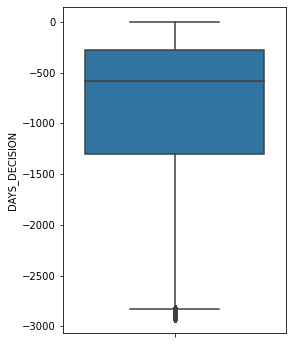

In [102]:
### Outliers check on DAYS_DECISION 
plt.figure(figsize=(4,6))
sns.boxplot(y=predata.DAYS_DECISION)

#### It shows no outlaires in decision

<AxesSubplot:ylabel='HOUR_APPR_PROCESS_START'>

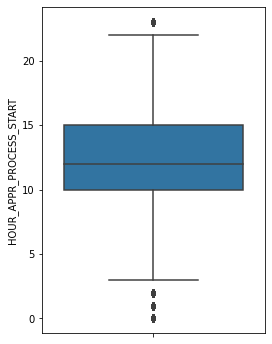

In [103]:
### Outliers check on HOUR_APPR_PROCESS_START 
plt.figure(figsize=(4,6))
sns.boxplot(y=predata.HOUR_APPR_PROCESS_START)

#### There are few outliers in process start time

In [104]:
predata.NAME_CONTRACT_STATUS.describe

<bound method NDFrame.describe of 0          Approved
1          Approved
2          Approved
3          Approved
4           Refused
             ...   
1670209    Approved
1670210    Approved
1670211    Approved
1670212    Approved
1670213    Approved
Name: NAME_CONTRACT_STATUS, Length: 1670214, dtype: object>

### Dividing predata on basis of loan approval

In [105]:
NAME_CONTRACT_STATUS_appr = predata[predata['NAME_CONTRACT_STATUS']=='Approved']

In [106]:
NAME_CONTRACT_STATUS_appr.head()

,SK_ID_PREV,SK_ID_CURR,NAME_CONTRACT_TYPE,AMT_APPLICATION,AMT_CREDIT,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,FLAG_LAST_APPL_PER_CONTRACT,NFLAG_LAST_APPL_IN_DAY,NAME_CASH_LOAN_PURPOSE,NAME_CONTRACT_STATUS,DAYS_DECISION,NAME_PAYMENT_TYPE,CODE_REJECT_REASON,NAME_CLIENT_TYPE,NAME_GOODS_CATEGORY,NAME_PORTFOLIO,NAME_PRODUCT_TYPE,CHANNEL_TYPE,SELLERPLACE_AREA,NAME_SELLER_INDUSTRY,NAME_YIELD_GROUP
0,2030495,271877,Consumer loans,17145.0,17145.0,SATURDAY,15,Y,1,XAP,Approved,-73,Cash through the bank,XAP,Repeater,Mobile,POS,XNA,Country-wide,35,Connectivity,middle
1,2802425,108129,Cash loans,607500.0,679671.0,THURSDAY,11,Y,1,XNA,Approved,-164,XNA,XAP,Repeater,XNA,Cash,x-sell,Contact center,-1,XNA,low_action
2,2523466,122040,Cash loans,112500.0,136444.5,TUESDAY,11,Y,1,XNA,Approved,-301,Cash through the bank,XAP,Repeater,XNA,Cash,x-sell,Credit and cash offices,-1,XNA,high
3,2819243,176158,Cash loans,450000.0,470790.0,MONDAY,7,Y,1,XNA,Approved,-512,Cash through the bank,XAP,Repeater,XNA,Cash,x-sell,Credit and cash offices,-1,XNA,middle
5,1383531,199383,Cash loans,315000.0,340573.5,SATURDAY,8,Y,1,Everyday expenses,Approved,-684,Cash through the bank,XAP,Repeater,XNA,Cash,x-sell,Credit and cash offices,-1,XNA,low_normal


In [107]:
NAME_CONTRACT_STATUS_refuse = predata[predata['NAME_CONTRACT_STATUS']=='Refused']

In [108]:
NAME_CONTRACT_STATUS_refuse.head()

,SK_ID_PREV,SK_ID_CURR,NAME_CONTRACT_TYPE,AMT_APPLICATION,AMT_CREDIT,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,FLAG_LAST_APPL_PER_CONTRACT,NFLAG_LAST_APPL_IN_DAY,NAME_CASH_LOAN_PURPOSE,NAME_CONTRACT_STATUS,DAYS_DECISION,NAME_PAYMENT_TYPE,CODE_REJECT_REASON,NAME_CLIENT_TYPE,NAME_GOODS_CATEGORY,NAME_PORTFOLIO,NAME_PRODUCT_TYPE,CHANNEL_TYPE,SELLERPLACE_AREA,NAME_SELLER_INDUSTRY,NAME_YIELD_GROUP
4,1784265,202054,Cash loans,337500.0,404055.0,THURSDAY,9,Y,1,Repairs,Refused,-781,Cash through the bank,HC,Repeater,XNA,Cash,walk-in,Credit and cash offices,-1,XNA,high
19,1173070,199178,Cash loans,45000.0,49455.0,SATURDAY,16,Y,1,Everyday expenses,Refused,-584,XNA,HC,Repeater,XNA,Cash,walk-in,AP+ (Cash loan),6,XNA,high
20,1506815,166490,Cash loans,450000.0,491580.0,MONDAY,6,Y,1,XNA,Refused,-401,Cash through the bank,HC,Repeater,XNA,Cash,x-sell,Credit and cash offices,-1,XNA,low_normal
22,1172842,302212,Cash loans,0.0,0.0,TUESDAY,9,Y,1,XNA,Refused,-239,XNA,HC,Repeater,XNA,XNA,XNA,Credit and cash offices,-1,XNA,XNA
23,1172937,302212,Cash loans,1129500.0,1277104.5,THURSDAY,5,Y,1,XNA,Refused,-594,Cash through the bank,HC,Repeater,XNA,Cash,x-sell,Credit and cash offices,-1,XNA,low_normal


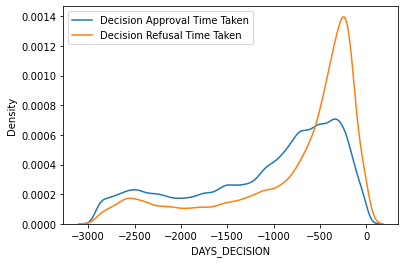

In [109]:
### ploting the decision time

sns.distplot(NAME_CONTRACT_STATUS_appr['DAYS_DECISION'],hist=False,label="Decision Approval Time Taken")
sns.distplot(NAME_CONTRACT_STATUS_refuse['DAYS_DECISION'],hist=False,label="Decision Refusal Time Taken")
plt.legend()

#### The above graph shows maximum decision time taken for Refusing a loan than Approving a loan.

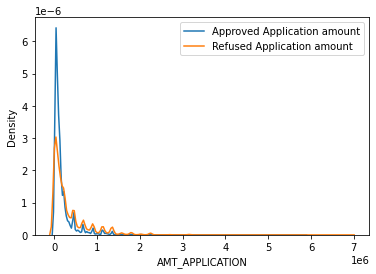

In [110]:

### analysins on APPLICATION Application amount

sns.distplot(NAME_CONTRACT_STATUS_appr['AMT_APPLICATION'],hist=False,label="Approved Application amount")
sns.distplot(NAME_CONTRACT_STATUS_refuse['AMT_APPLICATION'],hist=False,label="Refused Application amount")
plt.legend()


#### This shows that approved application amount is greater than Refused application 

<AxesSubplot:title={'center':'Refused amount'}, xlabel='NAME_CONTRACT_TYPE', ylabel='AMT_CREDIT'>

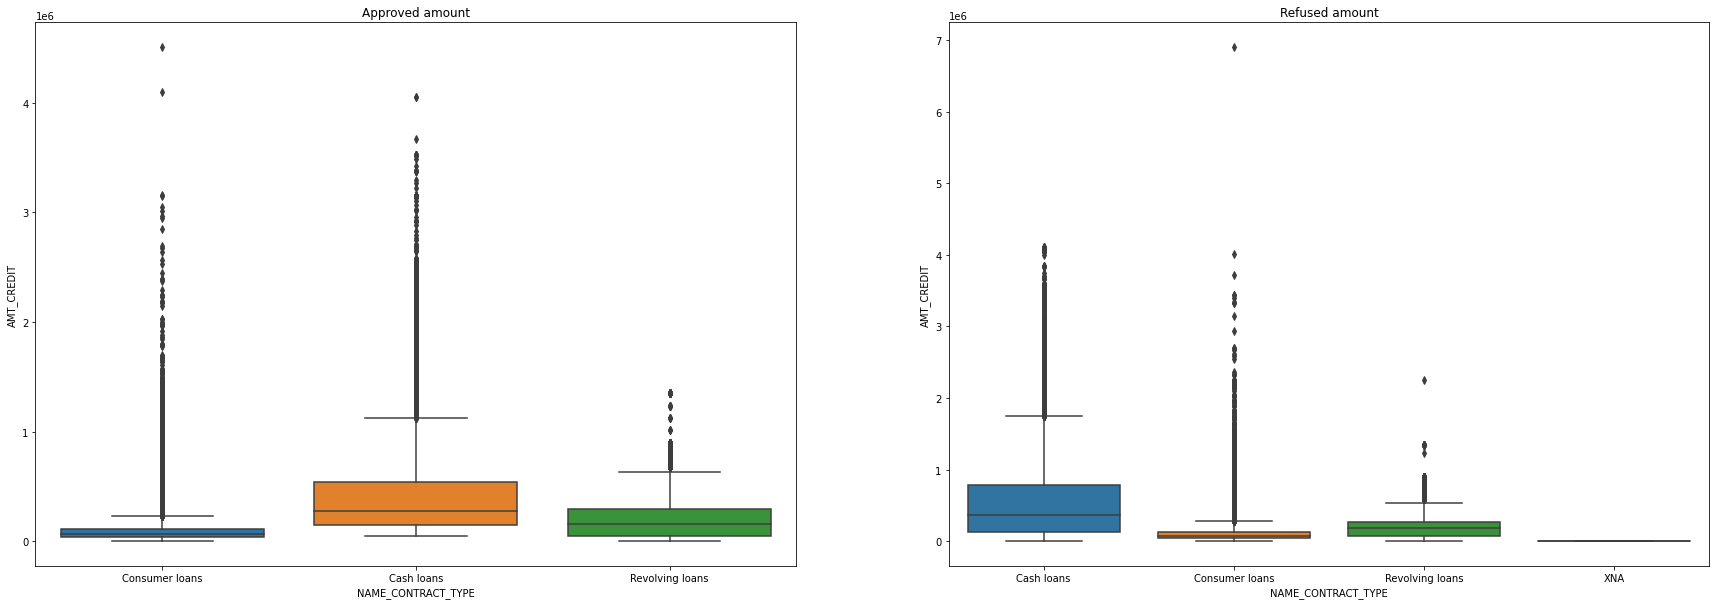

In [111]:
### Bivariate Categorical Continous Analysis ########

plt.figure(figsize=(30,10))
plt.subplot(1,2,1)
plt.title('Approved amount')

sns.boxplot( x="NAME_CONTRACT_TYPE", y="AMT_CREDIT",data=NAME_CONTRACT_STATUS_appr)
plt.subplot(1,2,2)
plt.title('Refused amount')
sns.boxplot( x="NAME_CONTRACT_TYPE", y="AMT_CREDIT",data=NAME_CONTRACT_STATUS_refuse)

##### here We can see cash loan applied mostly.

<AxesSubplot:xlabel='NAME_CONTRACT_TYPE', ylabel='count'>

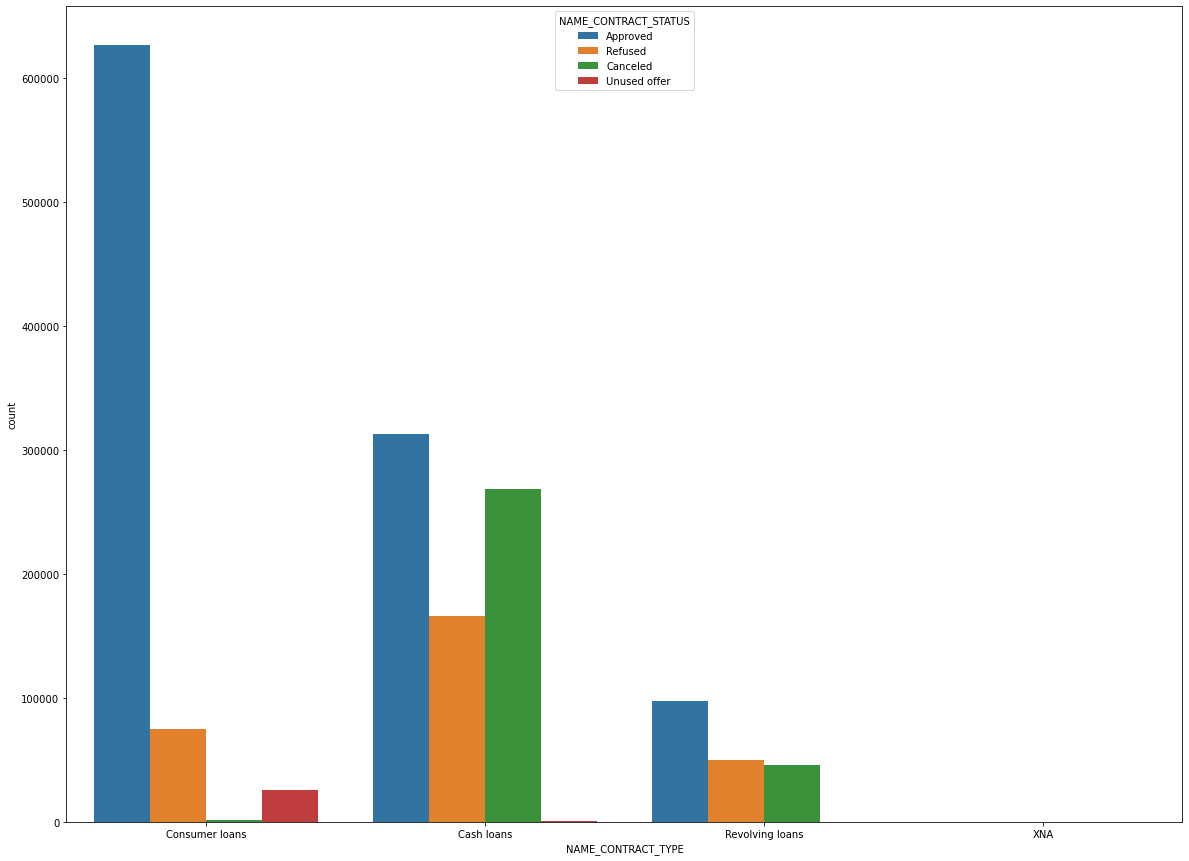

In [112]:
#Bivariate Categorical Categorical ########

plt.figure(figsize=(20,15))
sns.countplot(x='NAME_CONTRACT_TYPE',hue='NAME_CONTRACT_STATUS',data=predata)

##### Here we can see the approved amount and unused amount is high for Consumer loans.
##### For cash loan refused and cancelled amount is high.

### Merging the application_data with previous application data

In [113]:
alldata = pd.merge(left=appdata, right=predata,how='inner', on='SK_ID_CURR',suffixes='_x')

In [114]:
alldata.shape

(1413701, 56)

In [115]:
alldata.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE_,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT_,AMT_ANNUITY,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START_,HOUR_APPR_PROCESS_START_,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,Income_group,Credit_Range,AGE,AGE_GROUP,SK_ID_PREV,NAME_CONTRACT_TYPEx,AMT_APPLICATION,AMT_CREDITx,WEEKDAY_APPR_PROCESS_STARTx,HOUR_APPR_PROCESS_STARTx,FLAG_LAST_APPL_PER_CONTRACT,NFLAG_LAST_APPL_IN_DAY,NAME_CASH_LOAN_PURPOSE,NAME_CONTRACT_STATUS,DAYS_DECISION,NAME_PAYMENT_TYPE,CODE_REJECT_REASON,NAME_CLIENT_TYPE,NAME_GOODS_CATEGORY,NAME_PORTFOLIO,NAME_PRODUCT_TYPE,CHANNEL_TYPE,SELLERPLACE_AREA,NAME_SELLER_INDUSTRY,NAME_YIELD_GROUP
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,-9461,-637,-3648.0,-2120,1,2,2,WEDNESDAY,10,0,0,0,0,0,0,Business Entity Type 3,MidIncomeGroup,300000-500000,25,"(20, 25]",1038818,Consumer loans,179055.0,179055.0,SATURDAY,9,Y,1,XAP,Approved,-606,XNA,XAP,New,Vehicles,POS,XNA,Stone,500,Auto technology,low_normal
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,State servant,Higher education,Married,House / apartment,0.003541,-16765,-1188,-1186.0,-291,2,1,1,MONDAY,11,0,0,0,0,0,0,School,HighIncomeGroup,1000000-1500000,45,"(40, 45]",1810518,Cash loans,900000.0,1035882.0,FRIDAY,12,Y,1,XNA,Approved,-746,XNA,XAP,Repeater,XNA,Cash,x-sell,Credit and cash offices,-1,XNA,low_normal
2,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,State servant,Higher education,Married,House / apartment,0.003541,-16765,-1188,-1186.0,-291,2,1,1,MONDAY,11,0,0,0,0,0,0,School,HighIncomeGroup,1000000-1500000,45,"(40, 45]",2636178,Consumer loans,337500.0,348637.5,SUNDAY,17,Y,1,XAP,Approved,-828,Cash through the bank,XAP,Refreshed,Furniture,POS,XNA,Stone,1400,Furniture,middle
3,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,State servant,Higher education,Married,House / apartment,0.003541,-16765,-1188,-1186.0,-291,2,1,1,MONDAY,11,0,0,0,0,0,0,School,HighIncomeGroup,1000000-1500000,45,"(40, 45]",2396755,Consumer loans,68809.5,68053.5,SATURDAY,15,Y,1,XAP,Approved,-2341,Cash through the bank,XAP,Refreshed,Consumer Electronics,POS,XNA,Country-wide,200,Consumer electronics,middle
4,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,Working,Secondary / secondary special,Single / not married,House / apartment,0.010032,-19046,-225,-4260.0,-2531,1,2,2,MONDAY,9,0,0,0,0,0,0,Government,LowIncomeGroup,0-150000,52,"(50, 55]",1564014,Consumer loans,24282.0,20106.0,FRIDAY,5,Y,1,XAP,Approved,-815,Cash through the bank,XAP,New,Mobile,POS,XNA,Regional / Local,30,Connectivity,middle


In [116]:
#contract status

alldata['NAME_CONTRACT_STATUS'].value_counts()*100/len(alldata)

Approved        62.679378
Canceled        18.351900
Refused         17.357984
Unused offer     1.610737
Name: NAME_CONTRACT_STATUS, dtype: float64

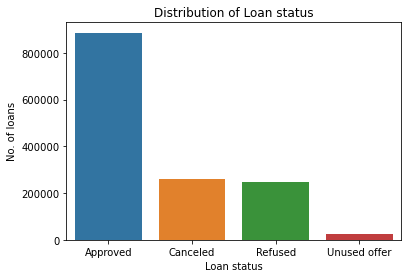

In [117]:
sns.countplot(alldata['NAME_CONTRACT_STATUS'])
plt.xlabel("Loan status")
plt.ylabel("No. of loans")
plt.title("Distribution of Loan status")
plt.show()

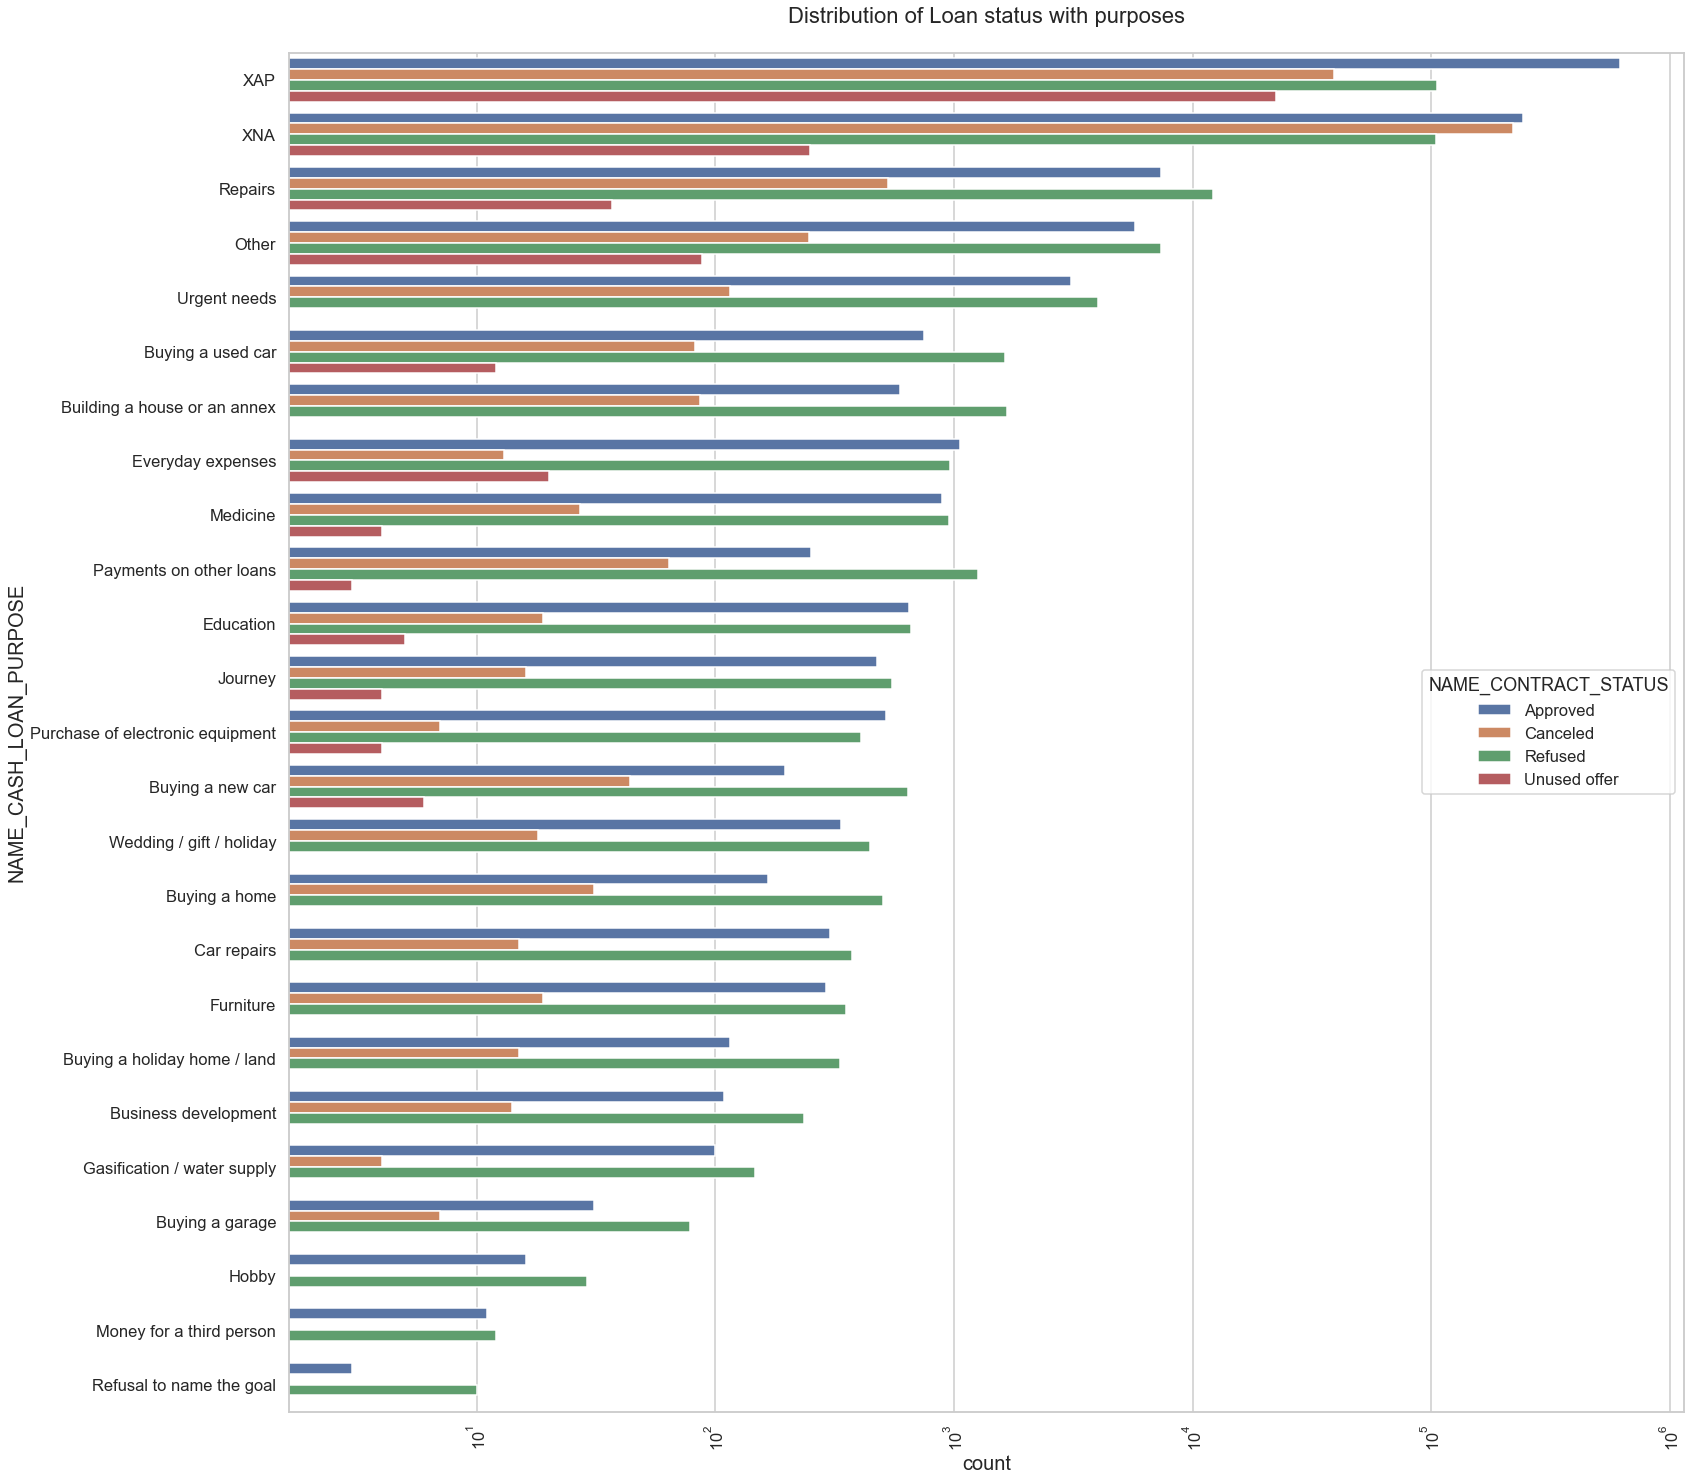

In [118]:
sns.set_style('whitegrid')
sns.set_context('talk')
plt.figure(figsize=(25,25))
plt.rcParams["axes.labelsize"] = 20
plt.rcParams['axes.titlesize'] = 22
plt.rcParams['axes.titlepad'] = 30
plt.xticks(rotation=90)
plt.xscale('log')
plt.title('Distribution of Loan status with purposes')
ax=sns.countplot(data = alldata, y='NAME_CASH_LOAN_PURPOSE', order=alldata['NAME_CASH_LOAN_PURPOSE'].value_counts().index,hue = 'NAME_CONTRACT_STATUS',palette='deep')

In [119]:
approved_loan = alldata[alldata['NAME_CONTRACT_STATUS']=='Approved']
refused_loan = alldata[alldata['NAME_CONTRACT_STATUS']=='Refused']
canceled_loan = alldata[alldata['NAME_CONTRACT_STATUS']=='Canceled']
unused_loan = alldata[alldata['NAME_CONTRACT_STATUS']=='Unused offer']

In [120]:
alldata['NAME_CONTRACT_TYPEx'].value_counts()

Cash loans         626764
Consumer loans     625256
Revolving loans    161368
XNA                   313
Name: NAME_CONTRACT_TYPEx, dtype: int64

In [121]:
def multi_plot(variable_name):
    fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(nrows=2,ncols=2, figsize=(20,20), sharey='all')
    fig.tight_layout(pad=16)

    ax1 = sns.countplot(ax=ax1,data=approved_loan,x=variable_name)
    ax1.set_title("APPROVED LOANS", fontsize=15)
    ax1.set_ylabel("NO. of Loans")
    ax1.set_xticklabels(ax1.get_xticklabels(),rotation=90)

    ax2 = sns.countplot(ax=ax2,data=refused_loan,x=variable_name)
    ax2.set_title("REFUSED LOANS", fontsize=15)
    ax2.set_ylabel("NO. of Loans")
    ax2.set_xticklabels(ax2.get_xticklabels(),rotation=90)

    ax3 = sns.countplot(ax=ax3,data=canceled_loan,x=variable_name)
    ax3.set_title("CANCELLED LOANS", fontsize=15)
    ax3.set_xlabel(variable_name)
    ax3.set_ylabel("NO. of Loans")
    ax3.set_xticklabels(ax3.get_xticklabels(),rotation=90)

    ax4 = sns.countplot(ax=ax4,data=unused_loan,x=variable_name)
    ax4.set_title("UNUSED LOANS", fontsize=15)
    ax4.set_xlabel(variable_name)
    ax4.set_ylabel("NO. of Loans")
    ax4.set_xticklabels(ax4.get_xticklabels(),rotation=90)
    
    plt.show()

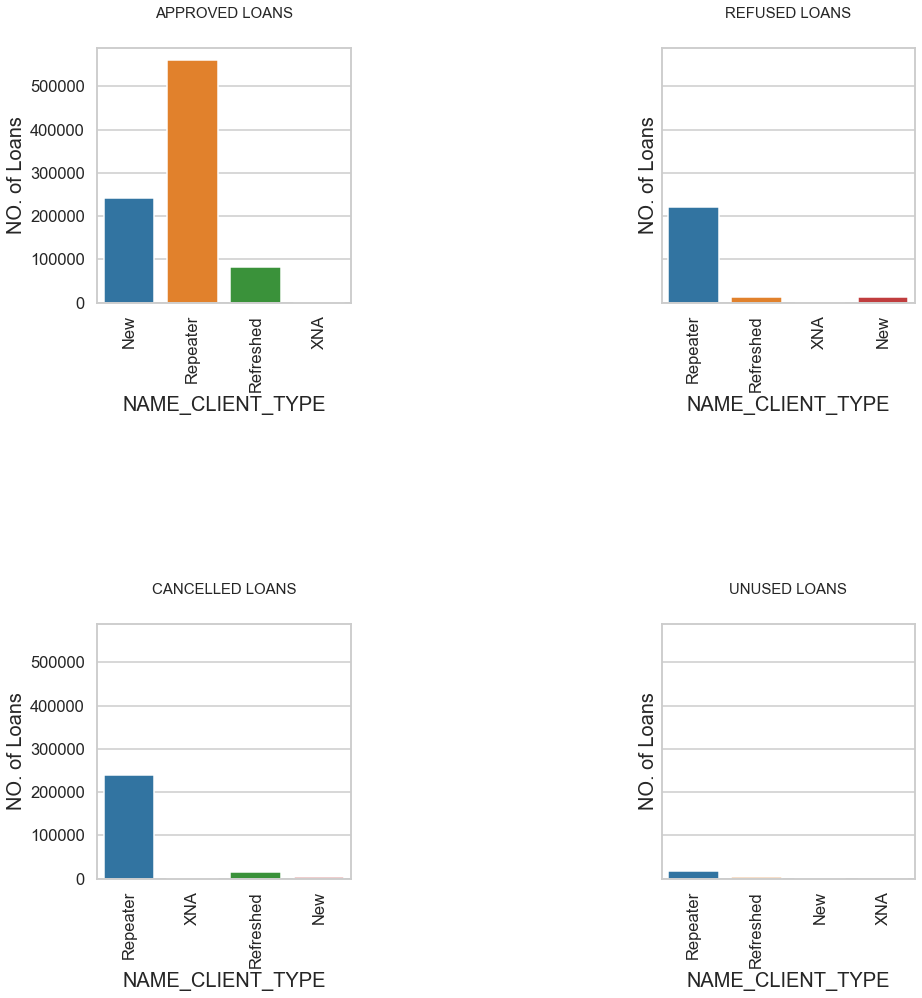

In [122]:
### Loan status on Client type

multi_plot('NAME_CLIENT_TYPE')

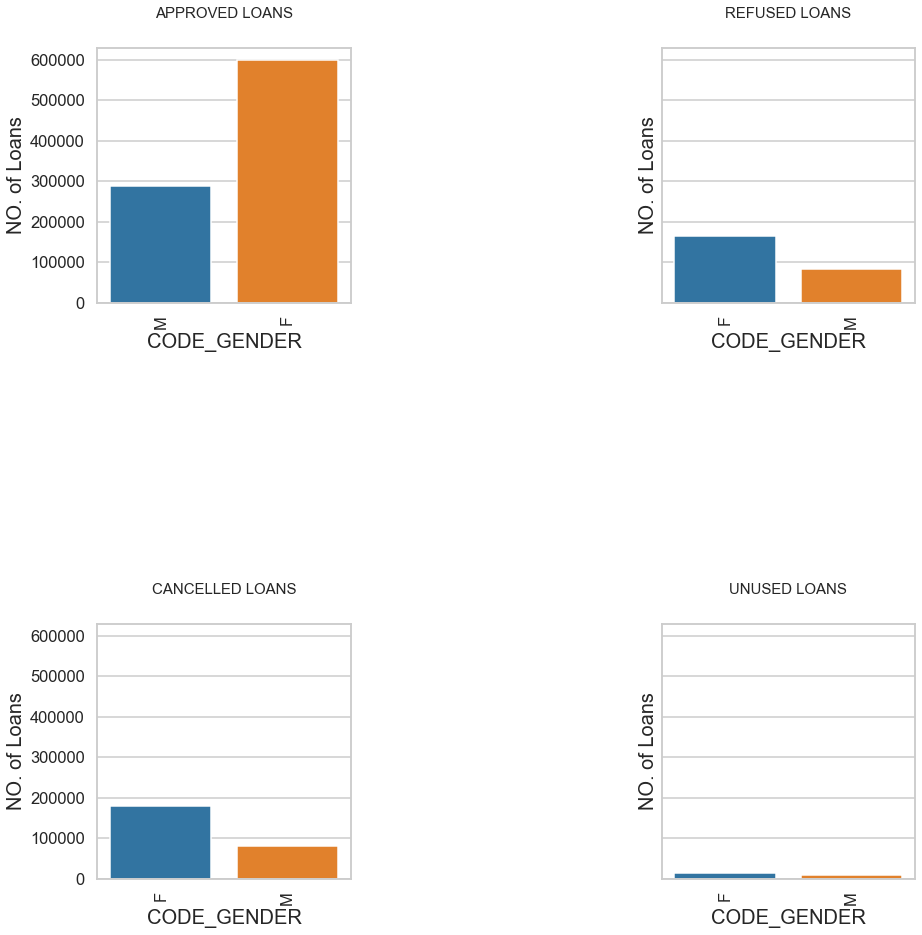

In [123]:
### Loan status on Gender type

multi_plot('CODE_GENDER')

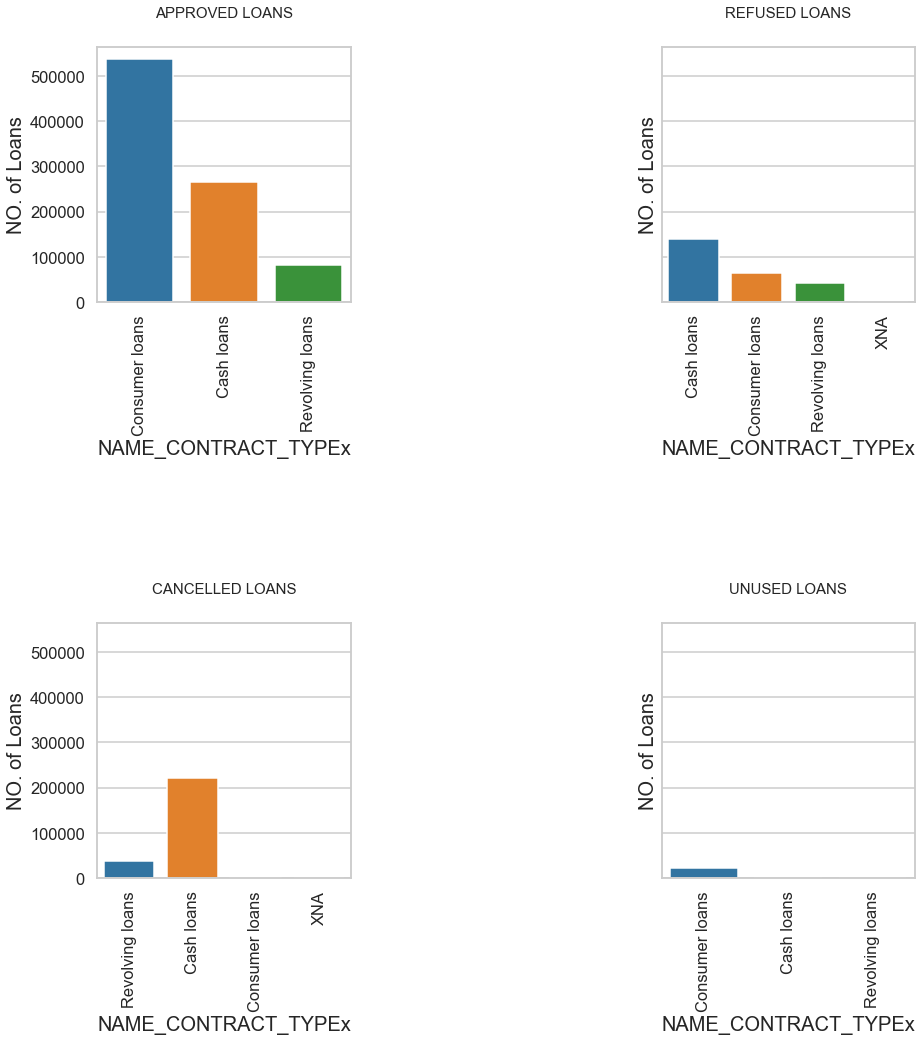

In [124]:
### Loan status on Contract type

multi_plot('NAME_CONTRACT_TYPEx')

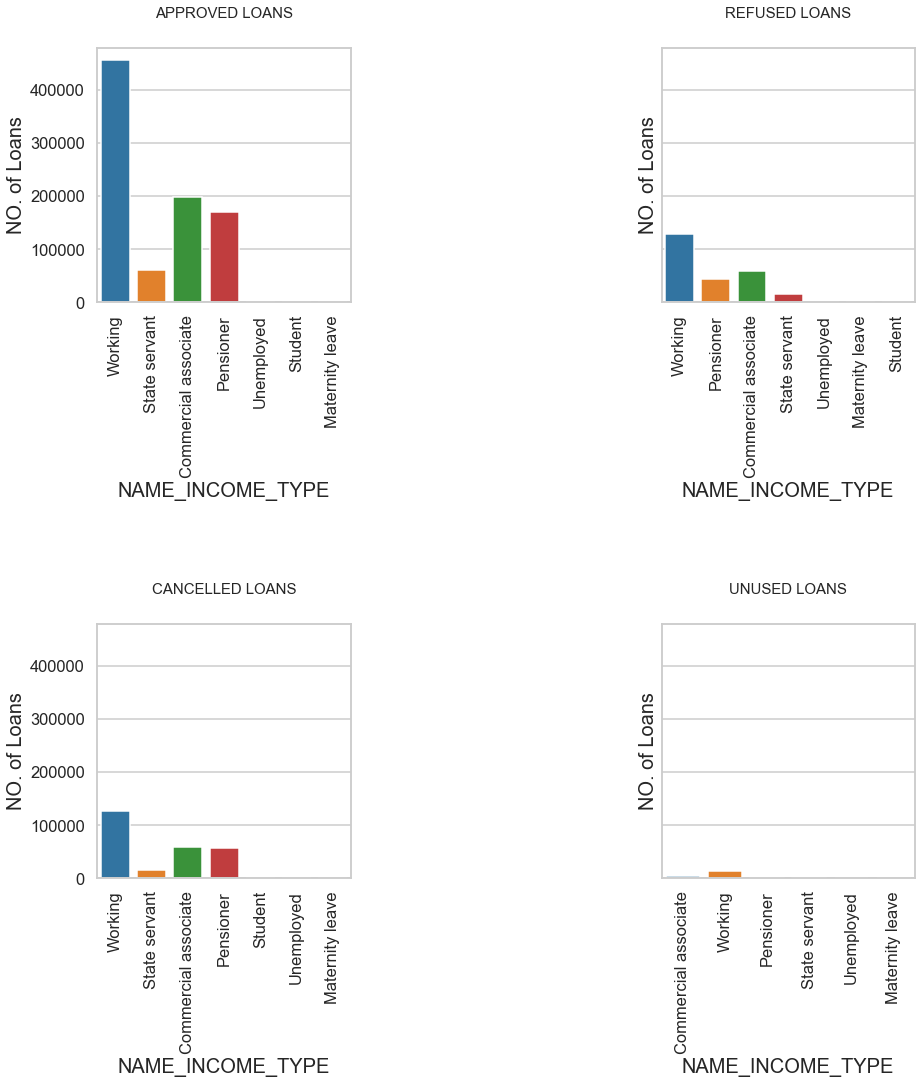

In [125]:
###loan status on income type

multi_plot('NAME_INCOME_TYPE')

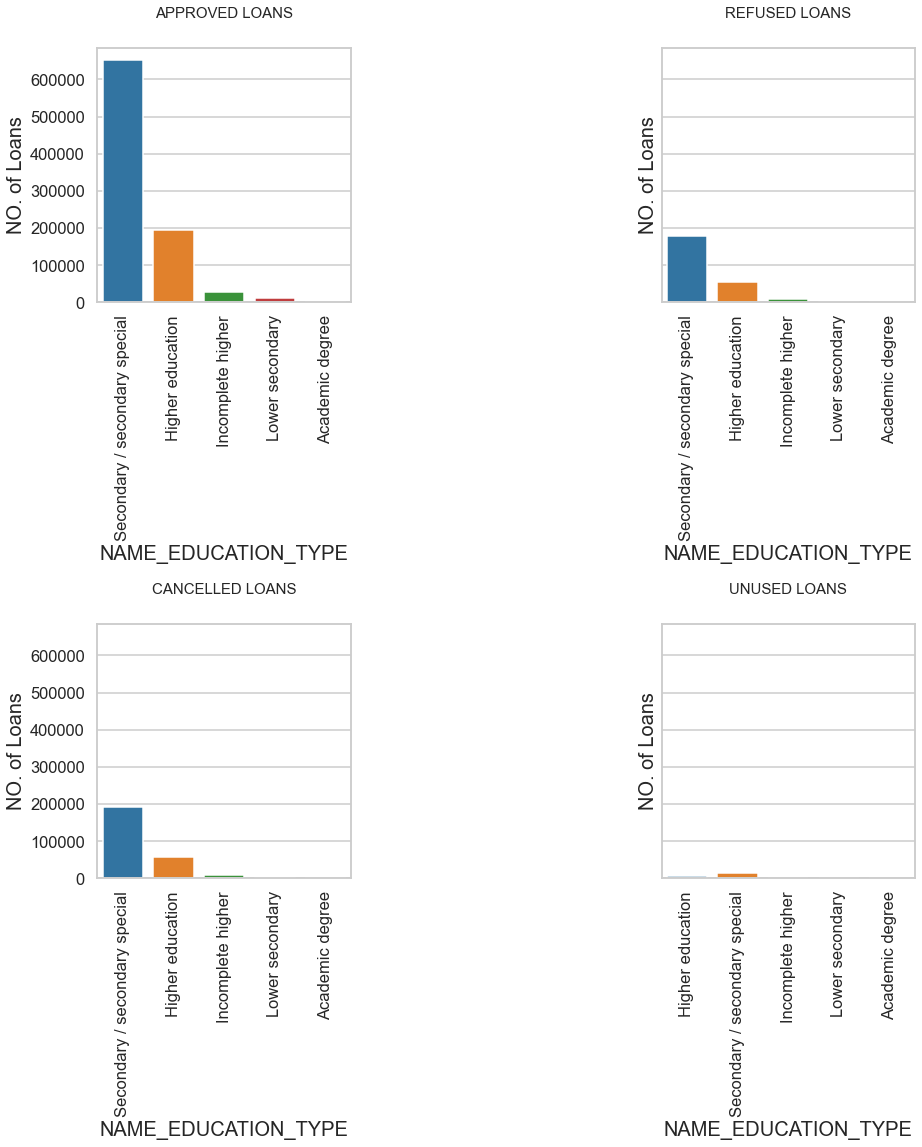

In [126]:
### loan status on Education type

multi_plot('NAME_EDUCATION_TYPE')

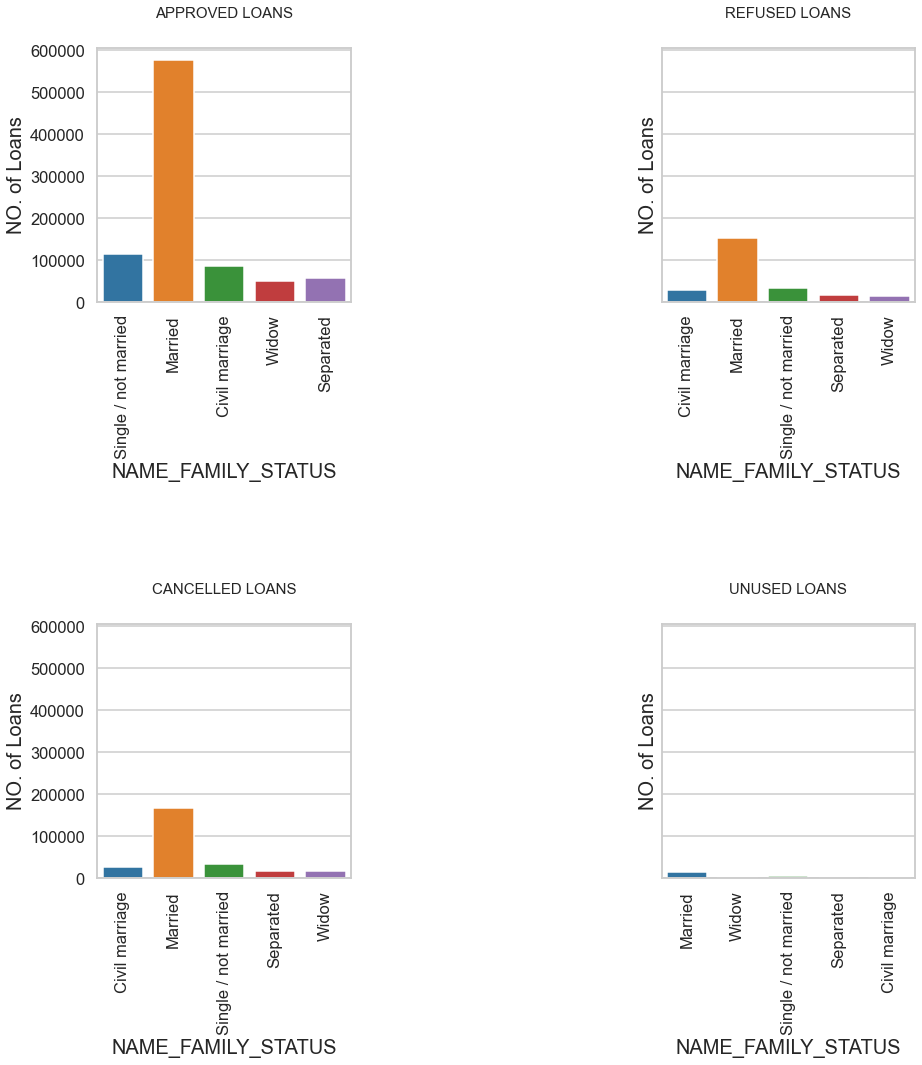

In [127]:
##### loan approval based on family status

multi_plot('NAME_FAMILY_STATUS')

#### -----------------------------------------------------

### Conclusions on the above Analysis---

#### 1. Higher education level improves the chances of Loans getting paid on time.
#### 2. Lower Income groups run a risk of default more than the Higher income groups so their credit amount 
####     should be strictly limited based on their Income level. 
#### 3. Employment history of an applicant should be considered before granting a loan as applicants with longer 
####     Employment period have lesser instances of default. 
#### 4. Age groups 25 – 35 years show signs of higher default among all the other age groups. More loans can be 
####     considered to be approved for age group of 35-45 as they have better income and longer employment.
#### 5. Time taken to refuse a loan application is higher and can be reduced.
#### 6.  Female applicants are the majority client-base so Men applicants can be encouraged to apply for more loans
####      by granting them better terms.
#### 7. Married / working applicants are among the major defaulter groups, so the risk of default can be better protected
####     by letting them be co-applicants.
#### 8. State servants and Commercial pensioners have a stable and secure source of income so they make good candidates 
####     for timely loan payments.

